# Coursera Capstone - The Battle of the Neighborhoods(Week 2)

### Please Note That Some Folium Map Outputs have Been Removed Due to Size Complications.

### Size Before Clearing Outputs was 71Mb and After Clearing is 9Mb 

# Table of Contents
* [Introduction / Business Problem](#Introduction)
* [DataSet Description](#Description) 
    * [Reqiurements](#Reqiurements)
    * [Processing](#Processing)
    * [Data](#Data)
    * [Description of Data](#Description-of-Data)
    * [Maps of Each City](#Maps-of-Each-City)
* [Methodology](#Methodology)  
* [Analysis](#Analysis)
    * [Restaurants HeatMaps](#Restaurants-HeatMaps)
    * [Restaurants HeatMaps with Cafes and Pizzeria Locations](#Restaurants-HeatMaps-with-Cafes-and-Pizzeria-Locations)
    * [Cafes and Pizzeria HeatMaps](#Cafes-and-Pizzeria-HeatMaps)
    * [Cluster Center Maps](#Cluster-Center-Maps)

## Introduction / Business Problem  <a name="Introduction"></a>

A Startup XYZ in India wants to set up Cafes and Pizzeria in top 10 Major Cities in India. The Startup wants to know the Specific Loaction in the Major Cities of India where setting up of Cafes or Pizzeria in those cities would profit it.This would also help in getting to know the taste of the people living in those cities. The Startup **aims at opening Cafe or Pizzeria** depending upon the **availability of the Pizzeria or Cafe at that place**, is **no Cafes or Pizzeria in vicinty**, is **closer to the city center**.

In Summation of the Problem set we need:
1. Availability of the Cafe or Pizzeria 
2. No Cafes or Pizzeria in vicinty
3. Should be Closer to the City Center

If we can figure out the above problems then, it would not also help the Startup but also help other startups that require necessary information about the types of restaurants that would be needed so as to introduce new taste to the people and would also help in knowing the specific taste of the people in those major cities. This information would also help businesses that are running already to expand their food options in either the same city in different vicinty or in some other cities. 

Top 10 Major Cities in India by Population are:
1.  **Mumbai (Maharashtra)**
2.	**Delhi (Delhi)**
3.	**Bangalore (Karnataka)**
4.	**Hyderabad (Telangana)**
5.	**Ahmedabad (Gujarat)**
6.	**Chennai (Tamil Nadu)**
7.	**Kolkata (West Bengal)**
8.	**Surat (Gujarat)**
9.	**Pune (Maharashtra)**
10.	**Jaipur (Rajasthan)**

## DataSet Description <a name="Description"></a>

### Reqiurements

The Raw Data Required for the Problem sets are :

1. Area Wise Postal Code of India : https://data.gov.in/sites/default/files/all_india_PO_list_without_APS_offices_ver2.csv
2. Latitudes and Longitudes of the Cities according to Postal Codes : http://download.geonames.org/export/zip/IN.zip

### Processing

The Raw Data needs to be processed on so as to generate a meaningful dataset that will help us in out in our problem set.

We Will do the following necessary operations:
* Generating the DataFrames on both the DataSets :
    * Extracting the information from csv where major cities are there
    * Extracting the information from zip where major cities are there
    * We can also use pgeocode library instead of the zip
* Combinig both the DataSets so as to get the preferred DataSet
* Mapping the data set according to the latitudes and longitudes of the major cities
* Getting the necessary restaurants in the cities according to categories using foursquare api 
* Exploring the Cities based on the categories and latitude and longitude

### Data

In [16]:
import pandas as pd
import numpy as np

In [78]:
data=pd.read_csv("all_india_PO_list_without_APS_offices_ver2.csv")

In [3]:
data

officename  pincode officeType Deliverystatus  \
0                   Achalapur B.O   504273        B.O       Delivery   
1                         Ada B.O   504293        B.O       Delivery   
2                     Adegaon B.O   504307        B.O       Delivery   
3       Adilabad Collectorate S.O   504001        S.O   Non-Delivery   
4                    Adilabad H.O   504001        H.O       Delivery   
...                           ...      ...        ...            ...   
154792       Uttar Sautanchak B.O   721649        B.O       Delivery   
154793            Uttarjianda B.O   721151        B.O       Delivery   
154794          Uttarkotebarh B.O   721626        B.O       Delivery   
154795         Uttarmechogram B.O   721139        B.O       Delivery   
154796           Uttarsonamui B.O   721648        B.O       Delivery   

       divisionname    regionname      circlename        Taluk  \
0          Adilabad     Hyderabad  Andhra Pradesh     Asifabad   
1          Adilabad     Hyderabad  Andhra Pradesh     Asifabad   
2          Adilabad     Hyderabad  Andhra Pradesh        Boath   
3          Adilabad     Hyderabad  Andhra Pradesh     Adilabad   
4          Adilabad     Hyderabad  Andhra Pradesh     Adilabad   
...             ...           ...             ...          ...   
154792       Tamluk  South Bengal     West Bengal   Nandakumar   
154793       Tamluk  South Bengal     West Bengal   Panskura-i   
154794       Tamluk  South Bengal     West Bengal  Bhagawanpur   
154795       Tamluk  South Bengal     West Bengal   Panskura-i   
154796       Tamluk  South Bengal     West Bengal   Nandakumar   

          Districtname    statename     Telephone  \
0             Adilabad    TELANGANA           NaN   
1             Adilabad    TELANGANA           NaN   
2             Adilabad    TELANGANA           NaN   
3             Adilabad    TELANGANA  08732-226703   
4             Adilabad    TELANGANA  08732-226738   
...                ...          ...           ...   
154792  East Midnapore  WEST BENGAL           NaN   
154793  East Midnapore  WEST BENGAL           NaN   
154794  East Midnapore  WEST BENGAL           NaN   
154795  East Midnapore  WEST BENGAL           NaN   
154796  East Midnapore  WEST BENGAL           NaN   

                   Related Suboffice Related Headoffice  
0                        Rechini S.O     Mancherial H.O  
1                       Asifabad S.O     Mancherial H.O  
2                         Echoda S.O       Adilabad H.O  
3                                NaN       Adilabad H.O  
4                                NaN                NaN  
...                              ...                ...  
154792                  Mirikpur S.O         Tamluk H.O  
154793  Bhogpur S.O (East Midnapore)         Tamluk H.O  
154794                 Kajlagarh S.O         Tamluk H.O  
154795                  Panskura S.O         Tamluk H.O  
154796              Byabattarhat S.O         Tamluk H.O  

[154797 rows x 13 columns]

Data Types of DataFrame

In [4]:
data.dtypes

officename            object
pincode                int64
officeType            object
Deliverystatus        object
divisionname          object
regionname            object
circlename            object
Taluk                 object
Districtname          object
statename             object
Telephone             object
Related Suboffice     object
Related Headoffice    object
dtype: object

Seeing if there are any Null values of Taluk(or Administrative Centers)

In [5]:
data[data['Taluk'].isnull()]

officename  pincode officeType Deliverystatus   divisionname  \
29          Badankurthy B.O   504203        B.O       Delivery       Adilabad   
37            Beernandi B.O   504203        B.O       Delivery       Adilabad   
119          Dilawarpur B.O   504203        B.O       Delivery       Adilabad   
301          Mandapalli B.O   504203        B.O       Delivery       Adilabad   
334     Nachan Yelcapur B.O   504203        B.O       Delivery       Adilabad   
...                     ...      ...        ...            ...            ...   
152966      Jangalapara S.O   712419        S.O       Delivery  Hooghly South   
153060     Singherbheri B.O   712409        B.O       Delivery  Hooghly South   
153630       Godapeasal S.O   721129        S.O       Delivery      Midnapore   
153847      Narayanbarh B.O   721144        B.O       Delivery      Midnapore   
154700    Nonakuribazar S.O   721172        S.O       Delivery         Tamluk   

          regionname      circlename Taluk    Districtname    statename  \
29         Hyderabad  Andhra Pradesh   NaN        Adilabad    TELANGANA   
37         Hyderabad  Andhra Pradesh   NaN        Adilabad    TELANGANA   
119        Hyderabad  Andhra Pradesh   NaN        Adilabad    TELANGANA   
301        Hyderabad  Andhra Pradesh   NaN        Adilabad    TELANGANA   
334        Hyderabad  Andhra Pradesh   NaN        Adilabad    TELANGANA   
...              ...             ...   ...             ...          ...   
152966  South Bengal     West Bengal   NaN         Hooghly  WEST BENGAL   
153060  South Bengal     West Bengal   NaN         Hooghly  WEST BENGAL   
153630  South Bengal     West Bengal   NaN  West Midnapore  WEST BENGAL   
153847  South Bengal     West Bengal   NaN  West Midnapore  WEST BENGAL   
154700  South Bengal     West Bengal   NaN  East Midnapore  WEST BENGAL   

           Telephone        Related Suboffice Related Headoffice  
29               NaN  Khanapur S.O (Adilabad)       Adilabad H.O  
37               NaN  Khanapur S.O (Adilabad)       Adilabad H.O  
119              NaN  Khanapur S.O (Adilabad)       Adilabad H.O  
301              NaN  Khanapur S.O (Adilabad)       Adilabad H.O  
334              NaN  Khanapur S.O (Adilabad)       Adilabad H.O  
...              ...                      ...                ...  
152966           NaN                      NaN      Serampore H.O  
153060           NaN               Singur S.O      Serampore H.O  
153630  03227-284293                      NaN      Midnapore H.O  
153847           NaN               Sabang S.O      Midnapore H.O  
154700  03228-258245                      NaN         Tamluk H.O  

[8309 rows x 13 columns]

Dropping the Null Values

In [6]:
data.drop(data.index[data['Taluk'].isnull()], inplace = True)
data=data.reset_index()
data.drop(['index'],axis=1,inplace=True)

Data After dropping Null values of Taluk(or Administrative Centers)

In [7]:
data

officename  pincode officeType Deliverystatus  \
0                   Achalapur B.O   504273        B.O       Delivery   
1                         Ada B.O   504293        B.O       Delivery   
2                     Adegaon B.O   504307        B.O       Delivery   
3       Adilabad Collectorate S.O   504001        S.O   Non-Delivery   
4                    Adilabad H.O   504001        H.O       Delivery   
...                           ...      ...        ...            ...   
146483       Uttar Sautanchak B.O   721649        B.O       Delivery   
146484            Uttarjianda B.O   721151        B.O       Delivery   
146485          Uttarkotebarh B.O   721626        B.O       Delivery   
146486         Uttarmechogram B.O   721139        B.O       Delivery   
146487           Uttarsonamui B.O   721648        B.O       Delivery   

       divisionname    regionname      circlename        Taluk  \
0          Adilabad     Hyderabad  Andhra Pradesh     Asifabad   
1          Adilabad     Hyderabad  Andhra Pradesh     Asifabad   
2          Adilabad     Hyderabad  Andhra Pradesh        Boath   
3          Adilabad     Hyderabad  Andhra Pradesh     Adilabad   
4          Adilabad     Hyderabad  Andhra Pradesh     Adilabad   
...             ...           ...             ...          ...   
146483       Tamluk  South Bengal     West Bengal   Nandakumar   
146484       Tamluk  South Bengal     West Bengal   Panskura-i   
146485       Tamluk  South Bengal     West Bengal  Bhagawanpur   
146486       Tamluk  South Bengal     West Bengal   Panskura-i   
146487       Tamluk  South Bengal     West Bengal   Nandakumar   

          Districtname    statename     Telephone  \
0             Adilabad    TELANGANA           NaN   
1             Adilabad    TELANGANA           NaN   
2             Adilabad    TELANGANA           NaN   
3             Adilabad    TELANGANA  08732-226703   
4             Adilabad    TELANGANA  08732-226738   
...                ...          ...           ...   
146483  East Midnapore  WEST BENGAL           NaN   
146484  East Midnapore  WEST BENGAL           NaN   
146485  East Midnapore  WEST BENGAL           NaN   
146486  East Midnapore  WEST BENGAL           NaN   
146487  East Midnapore  WEST BENGAL           NaN   

                   Related Suboffice Related Headoffice  
0                        Rechini S.O     Mancherial H.O  
1                       Asifabad S.O     Mancherial H.O  
2                         Echoda S.O       Adilabad H.O  
3                                NaN       Adilabad H.O  
4                                NaN                NaN  
...                              ...                ...  
146483                  Mirikpur S.O         Tamluk H.O  
146484  Bhogpur S.O (East Midnapore)         Tamluk H.O  
146485                 Kajlagarh S.O         Tamluk H.O  
146486                  Panskura S.O         Tamluk H.O  
146487              Byabattarhat S.O         Tamluk H.O  

[146488 rows x 13 columns]

### Description of Data <a name='Description-of-Data'></a>

The Table above consists of 13 Columns. This data is a raw data and needs to be processed.

**The Columns are:**
* Office Name of the Post Office 
* Pincode of the Area of Post Office
* The Type of Office
* Delivery Status
* Division Name
* Region Name 
* Circle Name 
* Taluk(or Administrative Centers)
* District Name
* State Name
* Telephone	
* Related Suboffice	
* Related Headoffice 

**Necessary Columns Are:**
* Pincode of the Area of Post Office
* Taluk(or Administrative Centers)
* District Name

Taking the Necessary Columns and Removing Duplicate Values of Pincode

In [8]:
not_dup=data[['pincode','Taluk','Districtname']]
not_dup=not_dup.drop_duplicates(subset='pincode').reset_index()
not_dup.drop(columns=['index'],inplace=True)
not_dup

pincode                Taluk    Districtname
0       504273             Asifabad        Adilabad
1       504293             Asifabad        Adilabad
2       504307                Boath        Adilabad
3       504001             Adilabad        Adilabad
4       504251          Bellampalle        Adilabad
...        ...                  ...             ...
18705   721604  Haldia Municipality  East Midnapore
18706   721625              Reapara  East Midnapore
18707   721153             Panskura  West Midnapore
18708   721655            Kajlagarh  East Midnapore
18709   721171      Sahid Matangini  East Midnapore

[18710 rows x 3 columns]

In [3]:
import pgeocode

Getting Latitudes and Longitudes Using **pgeocode** Library

In [10]:
latitude=[]
longitude=[]
nomi = pgeocode.Nominatim('in')
for i in range(len(not_dup)):
    x=str(not_dup.at[i,'pincode'])
    query=nomi.query_postal_code(x)
    if query.empty :
        print("Error")
    else:
        latitude.append(query['latitude'])
        longitude.append(query['longitude'])
        print(i,end=' ')
not_dup['latitude']=latitude
not_dup['longitude']=longitude

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 

3524 3525 3526 3527 3528 3529 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541 3542 3543 3544 3545 3546 3547 3548 3549 3550 3551 3552 3553 3554 3555 3556 3557 3558 3559 3560 3561 3562 3563 3564 3565 3566 3567 3568 3569 3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611 3612 3613 3614 3615 3616 3617 3618 3619 3620 3621 3622 3623 3624 3625 3626 3627 3628 3629 3630 3631 3632 3633 3634 3635 3636 3637 3638 3639 3640 3641 3642 3643 3644 3645 3646 3647 3648 3649 3650 3651 3652 3653 3654 3655 3656 3657 3658 3659 3660 3661 3662 3663 3664 3665 3666 3667 3668 3669 3670 3671 3672 3673 3674 3675 3676 3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718 3719 3720 3721 3722 3723 

5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339 5340 5341 5342 5343 5344 5345 5346 5347 5348 5349 5350 5351 5352 5353 5354 5355 5356 5357 5358 5359 5360 5361 5362 5363 5364 5365 5366 5367 5368 5369 5370 5371 5372 5373 5374 5375 

6827 6828 6829 6830 6831 6832 6833 6834 6835 6836 6837 6838 6839 6840 6841 6842 6843 6844 6845 6846 6847 6848 6849 6850 6851 6852 6853 6854 6855 6856 6857 6858 6859 6860 6861 6862 6863 6864 6865 6866 6867 6868 6869 6870 6871 6872 6873 6874 6875 6876 6877 6878 6879 6880 6881 6882 6883 6884 6885 6886 6887 6888 6889 6890 6891 6892 6893 6894 6895 6896 6897 6898 6899 6900 6901 6902 6903 6904 6905 6906 6907 6908 6909 6910 6911 6912 6913 6914 6915 6916 6917 6918 6919 6920 6921 6922 6923 6924 6925 6926 6927 6928 6929 6930 6931 6932 6933 6934 6935 6936 6937 6938 6939 6940 6941 6942 6943 6944 6945 6946 6947 6948 6949 6950 6951 6952 6953 6954 6955 6956 6957 6958 6959 6960 6961 6962 6963 6964 6965 6966 6967 6968 6969 6970 6971 6972 6973 6974 6975 6976 6977 6978 6979 6980 6981 6982 6983 6984 6985 6986 6987 6988 6989 6990 6991 6992 6993 6994 6995 6996 6997 6998 6999 7000 7001 7002 7003 7004 7005 7006 7007 7008 7009 7010 7011 7012 7013 7014 7015 7016 7017 7018 7019 7020 7021 7022 7023 7024 7025 7026 

8467 8468 8469 8470 8471 8472 8473 8474 8475 8476 8477 8478 8479 8480 8481 8482 8483 8484 8485 8486 8487 8488 8489 8490 8491 8492 8493 8494 8495 8496 8497 8498 8499 8500 8501 8502 8503 8504 8505 8506 8507 8508 8509 8510 8511 8512 8513 8514 8515 8516 8517 8518 8519 8520 8521 8522 8523 8524 8525 8526 8527 8528 8529 8530 8531 8532 8533 8534 8535 8536 8537 8538 8539 8540 8541 8542 8543 8544 8545 8546 8547 8548 8549 8550 8551 8552 8553 8554 8555 8556 8557 8558 8559 8560 8561 8562 8563 8564 8565 8566 8567 8568 8569 8570 8571 8572 8573 8574 8575 8576 8577 8578 8579 8580 8581 8582 8583 8584 8585 8586 8587 8588 8589 8590 8591 8592 8593 8594 8595 8596 8597 8598 8599 8600 8601 8602 8603 8604 8605 8606 8607 8608 8609 8610 8611 8612 8613 8614 8615 8616 8617 8618 8619 8620 8621 8622 8623 8624 8625 8626 8627 8628 8629 8630 8631 8632 8633 8634 8635 8636 8637 8638 8639 8640 8641 8642 8643 8644 8645 8646 8647 8648 8649 8650 8651 8652 8653 8654 8655 8656 8657 8658 8659 8660 8661 8662 8663 8664 8665 8666 

10089 10090 10091 10092 10093 10094 10095 10096 10097 10098 10099 10100 10101 10102 10103 10104 10105 10106 10107 10108 10109 10110 10111 10112 10113 10114 10115 10116 10117 10118 10119 10120 10121 10122 10123 10124 10125 10126 10127 10128 10129 10130 10131 10132 10133 10134 10135 10136 10137 10138 10139 10140 10141 10142 10143 10144 10145 10146 10147 10148 10149 10150 10151 10152 10153 10154 10155 10156 10157 10158 10159 10160 10161 10162 10163 10164 10165 10166 10167 10168 10169 10170 10171 10172 10173 10174 10175 10176 10177 10178 10179 10180 10181 10182 10183 10184 10185 10186 10187 10188 10189 10190 10191 10192 10193 10194 10195 10196 10197 10198 10199 10200 10201 10202 10203 10204 10205 10206 10207 10208 10209 10210 10211 10212 10213 10214 10215 10216 10217 10218 10219 10220 10221 10222 10223 10224 10225 10226 10227 10228 10229 10230 10231 10232 10233 10234 10235 10236 10237 10238 10239 10240 10241 10242 10243 10244 10245 10246 10247 10248 10249 10250 10251 10252 10253 10254 1025

11460 11461 11462 11463 11464 11465 11466 11467 11468 11469 11470 11471 11472 11473 11474 11475 11476 11477 11478 11479 11480 11481 11482 11483 11484 11485 11486 11487 11488 11489 11490 11491 11492 11493 11494 11495 11496 11497 11498 11499 11500 11501 11502 11503 11504 11505 11506 11507 11508 11509 11510 11511 11512 11513 11514 11515 11516 11517 11518 11519 11520 11521 11522 11523 11524 11525 11526 11527 11528 11529 11530 11531 11532 11533 11534 11535 11536 11537 11538 11539 11540 11541 11542 11543 11544 11545 11546 11547 11548 11549 11550 11551 11552 11553 11554 11555 11556 11557 11558 11559 11560 11561 11562 11563 11564 11565 11566 11567 11568 11569 11570 11571 11572 11573 11574 11575 11576 11577 11578 11579 11580 11581 11582 11583 11584 11585 11586 11587 11588 11589 11590 11591 11592 11593 11594 11595 11596 11597 11598 11599 11600 11601 11602 11603 11604 11605 11606 11607 11608 11609 11610 11611 11612 11613 11614 11615 11616 11617 11618 11619 11620 11621 11622 11623 11624 11625 1162

12834 12835 12836 12837 12838 12839 12840 12841 12842 12843 12844 12845 12846 12847 12848 12849 12850 12851 12852 12853 12854 12855 12856 12857 12858 12859 12860 12861 12862 12863 12864 12865 12866 12867 12868 12869 12870 12871 12872 12873 12874 12875 12876 12877 12878 12879 12880 12881 12882 12883 12884 12885 12886 12887 12888 12889 12890 12891 12892 12893 12894 12895 12896 12897 12898 12899 12900 12901 12902 12903 12904 12905 12906 12907 12908 12909 12910 12911 12912 12913 12914 12915 12916 12917 12918 12919 12920 12921 12922 12923 12924 12925 12926 12927 12928 12929 12930 12931 12932 12933 12934 12935 12936 12937 12938 12939 12940 12941 12942 12943 12944 12945 12946 12947 12948 12949 12950 12951 12952 12953 12954 12955 12956 12957 12958 12959 12960 12961 12962 12963 12964 12965 12966 12967 12968 12969 12970 12971 12972 12973 12974 12975 12976 12977 12978 12979 12980 12981 12982 12983 12984 12985 12986 12987 12988 12989 12990 12991 12992 12993 12994 12995 12996 12997 12998 12999 1300

14213 14214 14215 14216 14217 14218 14219 14220 14221 14222 14223 14224 14225 14226 14227 14228 14229 14230 14231 14232 14233 14234 14235 14236 14237 14238 14239 14240 14241 14242 14243 14244 14245 14246 14247 14248 14249 14250 14251 14252 14253 14254 14255 14256 14257 14258 14259 14260 14261 14262 14263 14264 14265 14266 14267 14268 14269 14270 14271 14272 14273 14274 14275 14276 14277 14278 14279 14280 14281 14282 14283 14284 14285 14286 14287 14288 14289 14290 14291 14292 14293 14294 14295 14296 14297 14298 14299 14300 14301 14302 14303 14304 14305 14306 14307 14308 14309 14310 14311 14312 14313 14314 14315 14316 14317 14318 14319 14320 14321 14322 14323 14324 14325 14326 14327 14328 14329 14330 14331 14332 14333 14334 14335 14336 14337 14338 14339 14340 14341 14342 14343 14344 14345 14346 14347 14348 14349 14350 14351 14352 14353 14354 14355 14356 14357 14358 14359 14360 14361 14362 14363 14364 14365 14366 14367 14368 14369 14370 14371 14372 14373 14374 14375 14376 14377 14378 1437

15583 15584 15585 15586 15587 15588 15589 15590 15591 15592 15593 15594 15595 15596 15597 15598 15599 15600 15601 15602 15603 15604 15605 15606 15607 15608 15609 15610 15611 15612 15613 15614 15615 15616 15617 15618 15619 15620 15621 15622 15623 15624 15625 15626 15627 15628 15629 15630 15631 15632 15633 15634 15635 15636 15637 15638 15639 15640 15641 15642 15643 15644 15645 15646 15647 15648 15649 15650 15651 15652 15653 15654 15655 15656 15657 15658 15659 15660 15661 15662 15663 15664 15665 15666 15667 15668 15669 15670 15671 15672 15673 15674 15675 15676 15677 15678 15679 15680 15681 15682 15683 15684 15685 15686 15687 15688 15689 15690 15691 15692 15693 15694 15695 15696 15697 15698 15699 15700 15701 15702 15703 15704 15705 15706 15707 15708 15709 15710 15711 15712 15713 15714 15715 15716 15717 15718 15719 15720 15721 15722 15723 15724 15725 15726 15727 15728 15729 15730 15731 15732 15733 15734 15735 15736 15737 15738 15739 15740 15741 15742 15743 15744 15745 15746 15747 15748 1574

16960 16961 16962 16963 16964 16965 16966 16967 16968 16969 16970 16971 16972 16973 16974 16975 16976 16977 16978 16979 16980 16981 16982 16983 16984 16985 16986 16987 16988 16989 16990 16991 16992 16993 16994 16995 16996 16997 16998 16999 17000 17001 17002 17003 17004 17005 17006 17007 17008 17009 17010 17011 17012 17013 17014 17015 17016 17017 17018 17019 17020 17021 17022 17023 17024 17025 17026 17027 17028 17029 17030 17031 17032 17033 17034 17035 17036 17037 17038 17039 17040 17041 17042 17043 17044 17045 17046 17047 17048 17049 17050 17051 17052 17053 17054 17055 17056 17057 17058 17059 17060 17061 17062 17063 17064 17065 17066 17067 17068 17069 17070 17071 17072 17073 17074 17075 17076 17077 17078 17079 17080 17081 17082 17083 17084 17085 17086 17087 17088 17089 17090 17091 17092 17093 17094 17095 17096 17097 17098 17099 17100 17101 17102 17103 17104 17105 17106 17107 17108 17109 17110 17111 17112 17113 17114 17115 17116 17117 17118 17119 17120 17121 17122 17123 17124 17125 1712

18329 18330 18331 18332 18333 18334 18335 18336 18337 18338 18339 18340 18341 18342 18343 18344 18345 18346 18347 18348 18349 18350 18351 18352 18353 18354 18355 18356 18357 18358 18359 18360 18361 18362 18363 18364 18365 18366 18367 18368 18369 18370 18371 18372 18373 18374 18375 18376 18377 18378 18379 18380 18381 18382 18383 18384 18385 18386 18387 18388 18389 18390 18391 18392 18393 18394 18395 18396 18397 18398 18399 18400 18401 18402 18403 18404 18405 18406 18407 18408 18409 18410 18411 18412 18413 18414 18415 18416 18417 18418 18419 18420 18421 18422 18423 18424 18425 18426 18427 18428 18429 18430 18431 18432 18433 18434 18435 18436 18437 18438 18439 18440 18441 18442 18443 18444 18445 18446 18447 18448 18449 18450 18451 18452 18453 18454 18455 18456 18457 18458 18459 18460 18461 18462 18463 18464 18465 18466 18467 18468 18469 18470 18471 18472 18473 18474 18475 18476 18477 18478 18479 18480 18481 18482 18483 18484 18485 18486 18487 18488 18489 18490 18491 18492 18493 18494 1849

Checking for Any places without latitudes and longitudes

In [11]:
not_dup[not_dup.latitude.isnull()]

pincode         Taluk   Districtname  latitude  longitude
1096    507121     Kunavaram        Khammam       NaN        NaN
1135    507129       Chintur        Khammam       NaN        NaN
1138    507135      Vr Puram        Khammam       NaN        NaN
1139    507113    Mothugudem        Khammam       NaN        NaN
1144    507130     Donkarayi  East Godavari       NaN        NaN
...        ...           ...            ...       ...        ...
18516   712705    Chandangar        Hooghly       NaN        NaN
18521   712418        Singur        Hooghly       NaN        NaN
18523   712426     Serampore        Hooghly       NaN        NaN
18524   712247     Serampore        Hooghly       NaN        NaN
18527   712411  Chandannagar        Hooghly       NaN        NaN

[99 rows x 5 columns]

Dropping Rows without Latitudes and Longitudes

In [12]:
not_dup.drop(not_dup.index[not_dup['latitude'].isnull()],inplace=True)
not_dup=not_dup.reset_index()
not_dup.drop(['index'],axis=1,inplace=True)

In [13]:
not_dup

pincode                Taluk    Districtname  latitude  longitude
0       504273             Asifabad        Adilabad   19.1989  79.052929
1       504293             Asifabad        Adilabad   19.2565  79.077385
2       504307                Boath        Adilabad   19.4165  78.561053
3       504001             Adilabad        Adilabad   19.5390  78.527000
4       504251          Bellampalle        Adilabad   18.7346  79.029627
...        ...                  ...             ...       ...        ...
18606   721604  Haldia Municipality  East Midnapore   22.0605  88.109700
18607   721625              Reapara  East Midnapore   22.2840  88.054000
18608   721153             Panskura  West Midnapore   22.4586  87.774500
18609   721655            Kajlagarh  East Midnapore   22.8486  87.996200
18610   721171      Sahid Matangini  East Midnapore   22.9768  87.780900

[18611 rows x 5 columns]

Getting the Information of only Major Cities of India (by Population)

In [14]:
major_cities=['Mumbai','Delhi','Bangalore','Hyderabad','Ahmedabad','Chennai','Kolkata','Surat','Pune','Jaipur']
major_data=not_dup[not_dup.Districtname.isin(major_cities)].reset_index()
major_data.drop(['index'],axis=1,inplace=True)
major_data

pincode           Taluk Districtname  latitude  longitude
0     500004     Khairatabad    Hyderabad   17.3872    78.4621
1     500045     Khairatabad    Hyderabad   17.5290    78.6839
2     500091  Rajendra Nagar    Hyderabad   17.3535    78.2402
3     500034     Khairatabad    Hyderabad   17.4168    78.4384
4     500022     Khairatabad    Hyderabad   17.4560    78.6476
..       ...             ...          ...       ...        ...
766   700052         Kolkata      Kolkata   23.3945    88.2559
767   700067         Kolkata      Kolkata   22.4839    88.3038
768   700090         Kolkata      Kolkata   22.4485    88.3883
769   700004         Kolkata      Kolkata   22.7101    88.3167
770   700050         Kolkata      Kolkata   23.3945    88.2559

[771 rows x 5 columns]

Visualization of the DataFrame

In [2]:
import seaborn as sns
from matplotlib import pyplot

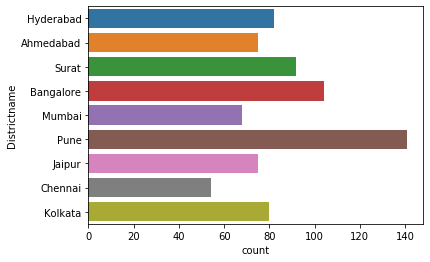

In [16]:
sns.countplot(y=major_data['Districtname'])

The above Graph Shows that there are more areas with District Name **Pune** than **Chennai**

Now let's create a grid of area candidates, equaly spaced, centered around city center and within ~6km from City Centers. Our neighborhoods will be defined as circular areas with a radius of 400 meters, so our neighborhood centers will be 800 meters apart.

To accurately calculate distances we need to create our grid of locations in Cartesian 2D coordinate system which allows us to calculate distances in meters (not in latitude/longitude degrees). Then we'll project those coordinates back to latitude/longitude degrees to be shown on Folium map. So let's create functions to convert between WGS84 spherical coordinate system (latitude/longitude degrees) and UTM Cartesian coordinate system (X/Y coordinates in meters).

In [32]:
#!pip install Shapely
import shapely.geometry

#!pip install pyproj
import pyproj

import math

def lonlat_to_xy(lon, lat):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
    return xy[0], xy[1]

def xy_to_lonlat(x, y):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[0], lonlat[1]

def calc_xy_distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    return math.sqrt(dx*dx + dy*dy)

  

In [4]:
from geopy.geocoders import Nominatim

The **Co-ordinate** Dictionary for keeping track of each coordinates of each city as well as their neighbourhoods.

co-ordinates=

              { City : 
                     
                     { Center : 
                      
                      { latitude :

                          longitude:  
                                  
                          X(m): 
                                  
                          y(m): 
                                  
                                  }
                                  
                        FoliumRadius :          
                                
                        CenterNeighbour : { Neighbour : { latitude:
                        
                                                          longitude:
                                                          
                                                          distancefromcenter:
                                                          
                                                          xs:
                                                          
                                                          ys:
                                                          
                                                          address:
                                                         }
                                                         
                                          }
                                          
                          
                         
                       }
                       
              }

In [20]:
x=[]
y=[]
la=[]
lo=[]
coordinates={ }
#the co-ordinates dictionary will look like above
major_cities=['Mumbai','Delhi','Bangalore','Hyderabad','Ahmedabad','Chennai','Kolkata','Surat','Pune','Jaipur']
for i in range(len(major_cities)):
    address = major_cities[i]
    geolocator = Nominatim(user_agent="xyz")#use any user agent but not default
    location = geolocator.geocode(address)
    print(" ")
    print('Coordinate transformation')
    print('-------------------------------')
    print('{} center longitude={}, latitude={}'.format(address,location[1][1],location[1][0]))
    xc,yc=lonlat_to_xy(location[1][1],location[1][0])
    x.append(xc), y.append(yc)
    print('{} center UTM X={}, Y={}'.format(address,xc, yc))
    loc,lac=xy_to_lonlat(xc,yc)
    lo.append(loc),la.append(lac)    
    print('{} center longitude={}, latitude={}'.format(address,loc, lac),sep=' ')
    colocation={ address: { 'Center' : {'latitude' : lac,
                                         'longitude' : loc, 
                                         'X(m)' : xc,
                                         'Y(m)' : yc}         
                           } 
                }
    coordinates.update(colocation)

 
Coordinate transformation
-------------------------------
Mumbai center longitude=72.8353355, latitude=18.9387711
Mumbai center UTM X=7524744.445684293, Y=3647080.8711747
Mumbai center longitude=72.83533549999986, latitude=18.938771099996888
 
Coordinate transformation
-------------------------------
Delhi center longitude=77.2219388, latitude=28.6517178
Delhi center UTM X=7111774.73054626, Y=5503242.6064808285
Delhi center longitude=77.22193879999885, latitude=28.651717800001283
 
Coordinate transformation
-------------------------------
Bangalore center longitude=77.5912997, latitude=12.9791198
Bangalore center UTM X=8887355.691656414, Y=2967556.189700127
Bangalore center longitude=77.59129969994802, latitude=12.979119800001909
 
Coordinate transformation
-------------------------------
Hyderabad center longitude=78.4610647345315, latitude=17.38878595
Hyderabad center UTM X=8605563.100591771, Y=3903241.887213427
Hyderabad center longitude=78.46106473454263, latitude=17.388785949971

In [21]:
coordinates # Coordinate Dictionary

{'Mumbai': {'Center': {'latitude': 18.938771099996888,
   'longitude': 72.83533549999986,
   'X(m)': 7524744.445684293,
   'Y(m)': 3647080.8711747}},
 'Delhi': {'Center': {'latitude': 28.651717800001283,
   'longitude': 77.22193879999885,
   'X(m)': 7111774.73054626,
   'Y(m)': 5503242.6064808285}},
 'Bangalore': {'Center': {'latitude': 12.979119800001909,
   'longitude': 77.59129969994802,
   'X(m)': 8887355.691656414,
   'Y(m)': 2967556.189700127}},
 'Hyderabad': {'Center': {'latitude': 17.388785949971492,
   'longitude': 78.46106473454263,
   'X(m)': 8605563.100591771,
   'Y(m)': 3903241.887213427}},
 'Ahmedabad': {'Center': {'latitude': 23.02162379999962,
   'longitude': 72.57970680000147,
   'X(m)': 7121296.015899579,
   'Y(m)': 4266067.76016978}},
 'Chennai': {'Center': {'latitude': 13.080172099923457,
   'longitude': 80.28383309985686,
   'X(m)': 9427096.62121908,
   'Y(m)': 3247861.145503533}},
 'Kolkata': {'Center': {'latitude': 22.567745899962482,
   'longitude': 88.347602299

We have Folium Radius as Every City Doesn't Have Equal Equidistant Center Circles

In [23]:
foliumradius=[239, 251, 200, 207, 251, 185, 187, 245, 233, 250]

Setting the FoliumRadius of each City in CO-Ordinate dictionary

In [24]:
i=0
for city in coordinates:
    coordinates[city]['FoliumRadius']=foliumradius[i]
    i=i+1

In [25]:
coordinates

{'Mumbai': {'Center': {'latitude': 18.938771099996888,
   'longitude': 72.83533549999986,
   'X(m)': 7524744.445684293,
   'Y(m)': 3647080.8711747},
  'FoliumRadius': 239},
 'Delhi': {'Center': {'latitude': 28.651717800001283,
   'longitude': 77.22193879999885,
   'X(m)': 7111774.73054626,
   'Y(m)': 5503242.6064808285},
  'FoliumRadius': 251},
 'Bangalore': {'Center': {'latitude': 12.979119800001909,
   'longitude': 77.59129969994802,
   'X(m)': 8887355.691656414,
   'Y(m)': 2967556.189700127},
  'FoliumRadius': 200},
 'Hyderabad': {'Center': {'latitude': 17.388785949971492,
   'longitude': 78.46106473454263,
   'X(m)': 8605563.100591771,
   'Y(m)': 3903241.887213427},
  'FoliumRadius': 207},
 'Ahmedabad': {'Center': {'latitude': 23.02162379999962,
   'longitude': 72.57970680000147,
   'X(m)': 7121296.015899579,
   'Y(m)': 4266067.76016978},
  'FoliumRadius': 251},
 'Chennai': {'Center': {'latitude': 13.080172099923457,
   'longitude': 80.28383309985686,
   'X(m)': 9427096.62121908,
 

Reverse Mapping of City Centers of Major Cities Using OpenCage Geocoding api

In [127]:
#!pip install opencage
from opencage.geocoder import OpenCageGeocode
geocoder = OpenCageGeocode(api_key)
def get_address(latitude,longitude, verbose=False):
        try:
            results = geocoder.reverse_geocode(latitude,longitude, language='', no_annotations='1')
            if results and len(results):
                print(" ")
                print(results[0]['formatted'])
        except:
            return [None, None]
for city in coordinates:
    get_address(coordinates[city]['Center']['latitude'],coordinates[city]['Center']['longitude'])

 
CSMT Bus Station, Saint George Road, A Ward, Mumbai - 40001, Maharashtra, India
 
cafe, Shraddhanand Road, Old Delhi, Delhi - 110006, Delhi, India
 
Sampangiram Nagar Ward, Bengaluru, Bangalore Urban, India
 
Ward 76 Mallepally, Hyderabad - 500002, Telangana, India
 
Victoria Garden, Swami Vivekananda Road, Dhalgarvad -khadia, Ahmedabad - 380001, Gujarat, India
 
Fort St. George, Charles Street, Ward 60, Chennai - 600009, Tamil Nadu, India
 
The Governor’s House (Raj Bhavan), Old Court House Street, Benoy-Badal-Dinesh Bagh, Kolkata - 700001, West Bengal, India
 
Dhiraj sons, Athwalines Road, Udhana, Surat - 395001, Gujarat, India
 
Sai Consulting, #2, Niranjav Madhav Marg, Shaniwar Peth, Pune - 411045, Maharashtra, India
 
Mirza Ismail Road, Adarsh Nagar, Jaipur Municipal Corporation - 302004, Rajasthan, India


In [27]:
for city in coordinates:
    coordinates[city]['CenterNeighbour']={}
    center_x, center_y = lonlat_to_xy(coordinates[city]['Center']['longitude'],coordinates[city]['Center']['latitude'])
    k = math.sqrt(3) / 2
    x_min = center_x - 6000
    x_step = 800
    y_min = center_y - 6000 - (int(21/k)*k*800 - 12000)/2
    y_step = 800 * k
    for i in range(0, int(21/k)):
        y = y_min + i * y_step
        x_offset = 400 if i%2==0 else 0
        for j in range(0, 21):
            x = x_min + j * x_step + x_offset
            distance_from_center = calc_xy_distance(center_x, center_y, x, y)
            if (distance_from_center <= 6001):
                lon, lat = xy_to_lonlat(x, y)
                centerneighbour= { 'latitude' : lat,
                                          'longitude' : lon,
                                          'distancefromcenter': distance_from_center,
                                          'x' : x,
                                          'y' : y
                                         }
                                       
                coordinates[city]['CenterNeighbour'].update({str((i,j)) : centerneighbour})           

In [ ]:
coordinates

In [1]:
import folium

In [4]:
map_city=[]
for address in coordinates:
    location=[coordinates[address]['Center']['latitude'],coordinates[address]['Center']['longitude']]
    map_=folium.Map(location=location, zoom_start=13)
    folium.Marker(location, popup=address+" Center").add_to(map_)
    for key in coordinates[address]['CenterNeighbour']:
        lat=coordinates[address]['CenterNeighbour'][key]['latitude']
        lon=coordinates[address]['CenterNeighbour'][key]['longitude']
        folium.Circle([lat, lon], radius=coordinates[address]['FoliumRadius'], color='blue', fill=False).add_to(map_)
    map_city.append(map_)    

In [5]:
map_city

### Maps of Each City

**Mumbai** City Map

In [6]:
map_city[0]

**Delhi** City Map

In [ ]:
map_city[1]

**Bangalore** City Map

In [ ]:
map_city[2]

**Hyderabad** City Map

In [ ]:
map_city[3]

**Ahmedabad** City Map

In [ ]:
map_city[4]

**Chennai** City Map

In [ ]:
map_city[5]

**Kolkata** City Map

In [ ]:
map_city[6]

**Surat** City Map

In [ ]:
map_city[7]

**Pune** City Map

In [ ]:
map_city[8]

**Jaipur** City Map

In [ ]:
map_city[9]

Getting Addresses of Each Latitude and Longitude(Reverse Geocoding) by Using OpenCage Geocoding Api

In [55]:
for city in coordinates:
    print('Obtaining location addresses for : '+city, end='')
    addresses = {}
    for Neighbour in coordinates[city]['CenterNeighbour']:
        try:
            results = geocoder.reverse_geocode(coordinates[city]['CenterNeighbour'][Neighbour]['latitude'],coordinates[city]['CenterNeighbour'][Neighbour]['longitude'], language='', no_annotations='1')
            if results and len(results):
                print(" ")
                coordinates[city]['CenterNeighbour'][Neighbour].update({ 'address' : results[0]['formatted'] })
                print(results[0]['formatted'])
            else:
                print('No Address')
        except Exception as E:
            print(E)
    print('Done for '+city)

Obtaining location addresses for : Mumbai 
A Ward, Mumbai - 400005, Maharashtra, India
 
Dalit Nagar, A Ward, Mumbai - 400005, Maharashtra, India
 
Sea Wind, Captain Prakash Pethe Marg, A Ward, Mumbai - 400005, Maharashtra, India
 
Sassoon Docks, Dumayne Marg, A Ward, Mumbai - 400005, Maharashtra, India
 
Sassoon Docks, Sassoon Dock Road, A Ward, Mumbai - 400005, Maharashtra, India
 
Colaba, Mumbai - 400005, Maharashtra, India
 
A Ward, Mumbai - 400005, Maharashtra, India
 
A Ward, Mumbai - 400005, Maharashtra, India
 
G.D. Somani School Grounds, GD Somani Road, A Ward, Mumbai - 400005, Maharashtra, India
 
Sasssoon Dock Gate No 1, Nanabhai Moos Marg, A Ward, Mumbai - 400005, Maharashtra, India
 
A Ward, Mumbai - 400005, Maharashtra, India
 
Shikra Naval Helibase, N Sawant Road, A Ward, Mumbai - 400005, Maharashtra, India
 
Dolphin Rock Lighthouse, V Desai Marg, A Ward, Mumbai - 400032, Maharashtra, India
 
Zone 1, Mumbai - 400006, Maharashtra, India
 
A Ward, Mumbai - 400 021, Maharas

 
P D' Mello Road, A Ward, Mumbai - 400038, Maharashtra, India
 
Mumbai Port Trust - MbPT, A Ward, Mumbai - 400038, Maharashtra, India
 
Mumbai Port Trust - MbPT, A Ward, Mumbai - 400038, Maharashtra, India
 
A Ward, Mumbai - 400038, Maharashtra, India
 
A Ward, Mumbai - 400038, Maharashtra, India
 
Zone 1, Koli Nagar - 400005, Maharashtra, India
 
Zone 1, Koli Nagar - 400005, Maharashtra, India
 
BM Ruia Girls College, Vachha Gandhi Marg, D Ward, Mumbai - 400036, Maharashtra, India
 
D Ward, Mumbai - 400007, Maharashtra, India
 
GPS, C Ward, Mumbai - 400002, Maharashtra, India
 
Mugbhat Lane, C Ward, Mumbai - 400004, Maharashtra, India
 
C Ward, Mumbai - 400002, Maharashtra, India
 
Zaveri Bazaar, Hanuman Road, C Ward, Mumbai - 400002, Maharashtra, India
 
Mahatma Jyotiba Phule Mandai, Carnac Road, A Ward, Mumbai - 400003, Maharashtra, India
 
P D' Mello Road, B Ward, Mumbai - 400038, Maharashtra, India
 
B.P.T COLLONY, P D' Mello Road, A Ward, Mumbai - 400088, Maharashtra, India
 
Mu

 
Firoz Shah Road, New Delhi - 110 001, Delhi, India
 
New Delhi - 020626, Delhi, India
 
Moti Bagh (East), Delhi - 110005, Delhi, India
 
6C, Karol Bagh, Delhi - 110005, Delhi, India
 
Tibia College, Gaffar Market, Ajmal Khan Road, Karol Bagh, Delhi - 110005, Delhi, India
 
East Park Road, Karol Bagh, Delhi - 110005, Delhi, India
 
Jhandewalan, Delhi - 110005, Delhi, India
 
Motia Khan, Delhi - 110055, Delhi, India
 
Paharganj, Delhi - 110055, Delhi, India
 
Citibank, Gali Chandi Wali, Paharganj, Delhi - 110055, Delhi, India
 
Chelmsford Road, Paharganj, Delhi - 110055, Delhi, India
 
Costa, Outer Circle, New Delhi - 110001, Delhi, India
 
New Delhi - 110 001, Delhi, India
 
Modern School, Barakhamba Road, New Delhi - 110 001, Delhi, India
 
New Delhi - 110 001, Delhi, India
 
Aaradhna - Senior Citizen's Home for Women, Bhagwan Das Lane, New Delhi - 110 001, Delhi, India
 
Vivekanand Puri, Delhi - 110005, Delhi, India
 
Railway Quaters, Delhi - 110005, Delhi, India
 
Moti Bagh (East),

 
Central Delhi, Delhi - 100006, Delhi, India
 
Central Delhi, Delhi - 110031V, Delhi, India
 
Yamuna River, Doctor KB Hedgewar Marg, Majnu Ka Tila, Delhi - 110054, Delhi, India
 
Majnu Ka Tila, Delhi - 110054, Delhi, India
 
NH9, Seelampur, Khajuri - 420420, Delhi, India
 
NH9, Seelampur, Khajuri - 420420, Delhi, India
 
Depot Approach Road, Seelampur, Khajuri - 420420, Delhi, India
 
Shastri Park Metro Station, Shastri Park Metro Station, Footover Bridge, Seelampur, Khajuri - 420420, Delhi, India
 
Shahdara, - 420420, Delhi, India
 
Yamun River, Pusta Road, Safeda Basti, - 110031V, Delhi, India
 
North East Delhi, Khajuri - 110053, Delhi, India
 
NH9, Seelampur, Khajuri - 420420, Delhi, India
 
NH9, Seelampur, Khajuri - 420420, Delhi, India
 
Seelampur, Khajuri - 420420, Delhi, India
 
Shahdara, - 420420, Delhi, India
Done for Delhi
Obtaining location addresses for : Bangalore 
Lakshmi Venkateshwara Temple, Krishna Rajendra Road, Sunkenahalli Ward, Bengaluru - 560 002, Karnataka, Ind

 
The Churches' Council for Child and Youth Care, 26, Lavelle Road, Shantala Nagar, Bengaluru - 560001, Karnataka, India
 
St. Joseph's College of Business Administration, F M Cariappa Road, Shantala Nagar, Bengaluru - 560 025, Karnataka, India
 
Pauline Book And Media Centre, Museum Road, Shantala Nagar, Bengaluru - 560025, Karnataka, India
 
೩ನೇ ರಸ್ತೆ, Shantala Nagar, Bengaluru - 560025, Karnataka, India
 
Lifestyle, Victoria Road, Shantala Nagar, Bengaluru - 560025, Karnataka, India
 
5th Main Road, Subhash Nagar, Bengaluru - 560003, Karnataka, India
 
Subhash Nagar, Bengaluru - 560 020, Karnataka, India
 
Bhavani Tiffin Center, Subedar Chatram Road, Gandhinagar, Bengaluru - 560 020, Karnataka, India
 
K C N Bhavan, 7/9 K, C.N.Bhavan, Yamuna bhai road, Yamuna Bai Road, Vasanth Nagar, Bengaluru - 560001, Karnataka, India
 
Bangalore Race Course, Devaraj Urs Road, Vasanth Nagar, Bengaluru - 560009, Karnataka, India
 
Bangalore Race Course, Devaraj Urs Road, Vasanth Nagar, Bengaluru - 

 
Bharathi Nagar Ward, Bengaluru - 56005, Karnataka, India
 
Kendriya Vidhyalaya, MEG Centre, St. John's Road, Bharathi Nagar Ward, Bengaluru - 560042, Karnataka, India
 
Palace Grounds Lake, T Chowdiah Road, Aramane Nagara Ward, Bengaluru - 560 052, Karnataka, India
 
Aramane Nagara Ward, Bengaluru - 560046, Karnataka, India
 
2nd Main Road, Jayamahal Ward, Bengaluru - 560046, Karnataka, India
 
5th Main Road, Jayamahal Ward, Bengaluru - 560046, Karnataka, India
 
FAIR FIELD APARTMENTS, Benson Cross Road, Jayamahal Ward, Bengaluru - 560046, Karnataka, India
 
Jayamahal Ward, Bengaluru - 560046, Karnataka, India
 
Santosh Pharma, Promenade Road, Pulikeshinagar, Bengaluru - 56005, Karnataka, India
 
1st Cross Road, Pulikeshinagar, Bengaluru - 56005, Karnataka, India
 
Khud-us-Sahib Muslim Graveyard, Nandi Durg Road, Jayamahal Ward, Bengaluru - 560046, Karnataka, India
 
Ramaswamy Palya Ward, Bengaluru - 560046, Karnataka, India
 
Ramaswamy Palya Ward, Bengaluru - 560046, Karnataka, Indi

 
Madarath Internation School, Rai Janakiprasad Road, Ward 73 Vijay Nagar Colony, Hyderabad - 500057, Telangana, India
 
Ward 73 Vijay Nagar Colony, Hyderabad - 500057, Telangana, India
 
Ward 76 Mallepally, Hyderabad - 500057, Telangana, India
 
Hotel Royal Plaza, 516, Yousuf Baba Dargah Road, Ward 77 Jambagh, Hyderabad - 500001, Telangana, India
 
Ward 77 Jambagh, Hyderabad - 500002, Telangana, India
 
Ward 77 Jambagh, Hyderabad - 500002, Telangana, India
 
Ward 77 Jambagh, Hyderabad - 500 095, Telangana, India
 
Ward 77 Jambagh, Hyderabad - 500 095, Telangana, India
 
Ward 77 Jambagh, Hyderabad - 500 095, Telangana, India
 
Mahatma Gandhi Bus Station, Chadarghat Road, Ward 30 Dabeerpura, Hyderabad - 500024, Telangana, India
 
Road No. 12, Ward 93 Banjara Hills, Hyderabad - 34500034, Telangana, India
 
Ward 93 Banjara Hills, Hyderabad - 500023, Telangana, India
 
First Lancer Road, Ward 74 Ahmed Nagar, Hyderabad - 500023, Telangana, India
 
SCF India, Chacha Nehru Park Road, Ward 74 

 
Sabarmati Riverfront Road, Ranna Park, Ahmedabad - 380001, Gujarat, India
 
SH142, Bhavna colony, Ahmedabad - 380001, Gujarat, India
 
NH8, Bhavna colony, Ahmedabad - 380001, Gujarat, India
 
DaniLimda, Ahmedabad - 380001, Gujarat, India
 
Shah E Alam Roza, Ahmedabad - 380001, Gujarat, India
 
Chandola Lake, Shah Alam Road, Shah E Alam Roza, Ahmedabad - 380001, Gujarat, India
 
Ambawadi, Ahmedabad - 380001, Gujarat, India
 
Ambawadi, Ahmedabad - 380001, Gujarat, India
 
Ambawadi, Ahmedabad - 380001, Gujarat, India
 
Vijubhai Dave Marg, Paldi, Ahmedabad - 380001, Gujarat, India
 
Paldi, Ahmedabad - 380001, Gujarat, India
 
Kochrab, Ahmedabad - 380043, Gujarat, India
 
Sabarmati Riverfront road, Kochrab, Ahmedabad - 380043, Gujarat, India
 
Jamalpur, Sabarmati River front Road, Ahmedabad - 380001, Gujarat, India
 
NH8, Bhavna colony, Ahmedabad - 380001, Gujarat, India
 
Behrampura, Ahmedabad - 380001, Gujarat, India
 
Lalbhai Kundiwala Marg, DaniLimda, Ahmedabad - 380001, Gujarat, Indi

 
Sukhrampura, Ahmedabad - 380001, Gujarat, India
 
Usmanpura, Ahmedabad - 380001, Gujarat, India
 
Usmanpura, Ahmedabad - 380001, Gujarat, India
 
Sabarmati Riverfront Road, Dudheshwar, Ahmedabad - 380001, Gujarat, India
 
Dudheshwar, Ahmedabad - 380001, Gujarat, India
 
Dudheshwar, Ahmedabad - 380001, Gujarat, India
 
Madhupura, Ahmedabad - 380001, Gujarat, India
 
Dariyapur, Ahmedabad - 380001, Gujarat, India
 
Prem Darwaza, Gheekanta Road, Dariyapur, Ahmedabad - 380001, Gujarat, India
 
Naroda Road, Dariyapur, Ahmedabad - 380001, Gujarat, India
 
Sarangpur, Ahmedabad - 380001, Gujarat, India
 
Sarangpur, Ahmedabad - 380001, Gujarat, India
 
Sukhrampura, Ahmedabad - 380001, Gujarat, India
 
Usmanpura, Ahmedabad - 380001, Gujarat, India
 
Sabarmati Riverfront Road, Dudheshwar, Ahmedabad - 380001, Gujarat, India
 
Dudheshwar, Ahmedabad - 380001, Gujarat, India
 
Madhupura, Ahmedabad - 380001, Gujarat, India
 
Madhupura, Ahmedabad - 380001, Gujarat, India
 
Madhupura, Ahmedabad - 38000

 
Maddox St, Ward 58, Chennai - 600003, Tamil Nadu, India
 
Perianna Maistry St, Ward 58, Chennai - 600003, Tamil Nadu, India
 
Corporation of Chennai, Raja Muthiah Road, Ward 58, Chennai - 600003, Tamil Nadu, India
 
Dhaba, General Hospital Road, Ward 59, Chennai - 60003, Tamil Nadu, India
 
Park Town, Burial Ground Road, Ward 59, Chennai - 60003, Tamil Nadu, India
 
Ward 59, Chennai - 60003, Tamil Nadu, India
 
Fort St. George, Charles Street, Ward 60, Chennai - 600009, Tamil Nadu, India
 
Rajaji Salai, Ward 60, Chennai - 600009, Tamil Nadu, India
 
Ward 60, Chennai - 600009, Tamil Nadu, India
 
Ward 60, Chennai - 600009, Tamil Nadu, India
 
Fort St. George, Chennai - 600009, Tamil Nadu, India
 
Fort St. George, Chennai - 600009, Tamil Nadu, India
 
Marina Beach, Chennai - 600005, Tamil Nadu, India
 
Chidambareswarar Temple - Agaya Stalam, Raghava Street, Ward 78, Chennai - 600011, Tamil Nadu, India
 
Maddox St, Ward 58, Chennai - 600003, Tamil Nadu, India
 
Baker Street, Ward 58, Ch

 
Jagat Bannerjee Ghat Road, Howrah, Howrah - 711101, West Bengal, India
 
Vidyasagar Setu, Hastings, Kolkata - 711102, West Bengal, India
 
Vidyasagar Setu, Hastings, Kolkata - 711102, West Bengal, India
 
Vidyasagar Setu, Hastings, Kolkata - 711102, West Bengal, India
 
Fort William, Khidderpur Road, Maidan, Kolkata - 700071, West Bengal, India
 
Khidderpur Road, Maidan, Kolkata - 700071, West Bengal, India
 
Kolkata Race Course, Khidderpur Road, Maidan, Kolkata - 700071, West Bengal, India
 
Howrah, Howrah - 711101, West Bengal, India
 
Ghoriwala Ground, Kali Kumar Mukherjee Lane, Howrah, Howrah - 711101, West Bengal, India
 
Howrah, Howrah - 711101, West Bengal, India
 
Howrah, Howrah - 711101, West Bengal, India
 
ラブボート, Strand Road, Benoy-Badal-Dinesh Bagh, Kolkata - 700021, West Bengal, India
 
Strand Road, Benoy-Badal-Dinesh Bagh, Kolkata - 700021, West Bengal, India
 
Fort William, Khidderpur Road, Maidan, Kolkata - 700071, West Bengal, India
 
Fort William, Khidderpur Road, M

 
Howrah Ghat, Rabindra Setu, Jagganath Ghat, Kolkata - 700073, West Bengal, India
 
Bara Bazar, Kolkata - 700001, West Bengal, India
 
Clive Ghat Street, Bara Bazar, Kolkata - 700001, West Bengal, India
 
Lions Range, Bara Bazar, Kolkata - 700001, West Bengal, India
 
Rabindra Sarani, Jorasanko North, Kolkata - 700001, West Bengal, India
 
Broadway Hotel, Ganesh Chandra Road, Chandi Chowk, Kolkata - 700001, West Bengal, India
 
Gumghar Ln, Chandi Chowk, Kolkata - 700013, West Bengal, India
 
Chandi Chowk, Kolkata - 700012, West Bengal, India
 
Drinking Water Station, Surendra Nath Bannerjee Road, Tal Tala, Kolkata - 700013, West Bengal, India
 
Doctor Lane, Tal Tala, Kolkata - 700014, West Bengal, India
 
St. James' School, 165, AJC Bose Road, Chandi Chowk East, Kolkata - 700014, West Bengal, India
 
Entali, Kolkata - 700014, West Bengal, India
 
Howrah, Howrah - 711101, West Bengal, India
 
Howrah, Howrah - 711101, West Bengal, India
 
Howrah Bridge, Rabindra Setu, Jagganath Ghat, Ko

 
Udhana, Surat - 395001, Gujarat, India
 
Udhana, Surat - 395001, Gujarat, India
 
Udhana, Surat - 395001, Gujarat, India
 
Udhana, Surat - 395001, Gujarat, India
 
Surat, Surat - 395001, Gujarat, India
 
Surat, Surat - 395001, Gujarat, India
 
Surat, Surat - 395001, Gujarat, India
 
Surat, Surat - 395001, Gujarat, India
 
LP Savani Road, Surat, Surat - 395001, Gujarat, India
 
Udhana, Surat - 395001, Gujarat, India
 
Athwalines Road, Udhana, Surat - 395001, Gujarat, India
 
Udhana, Surat - 395001, Gujarat, India
 
Udhana, Surat - 395001, Gujarat, India
 
Ghod Dhod Road, Udhana, Surat - 395001, Gujarat, India
 
Udhana, Surat - 395001, Gujarat, India
 
Udhana, Surat - 395001, Gujarat, India
 
Udhna Magdalla Road, Udhana, Surat - 395001, Gujarat, India
 
Bamroli Road, Udhana, Surat - 395001, Gujarat, India
 
Udhana, Surat - 395001, Gujarat, India
 
Surat, Surat - 395001, Gujarat, India
 
Grassland 2, LP Savani Road, Surat, Surat - 395001, Gujarat, India
 
LP Savani Road, Surat, Surat - 

 
Film and Television Institute of India, Vishnushastri Chiplunkar Path, Erandwana, Pune - 411004, Maharashtra, India
 
Erandwana, Pune - 411001, Maharashtra, India
 
Erandwana, Pune - 411001, Maharashtra, India
 
Vaikuntha Smashanbhoomi, Sant Tukaram Maharaj Road, Navi Peth, Pune - 411001, Maharashtra, India
 
Navi Peth, Pune - 411001, Maharashtra, India
 
Madhavrao Peshve Marg, Dattawadi, Pune - 411001, Maharashtra, India
 
Sane Guruji Marg, Swargate, Pune - 411001, Maharashtra, India
 
Sarasnagar Siddhivanayak Society, Swargate, Pune - 411001, Maharashtra, India
 
Swargate, Pune - 411001, Maharashtra, India
 
Swargate, Pune - 411001, Maharashtra, India
 
Swargate, Pune - 411001, Maharashtra, India
 
Automotive Research Association of India (ARAI), ARAI Road, Erandwana, Pune - 411 004, Maharashtra, India
 
ILS Law College, Vishnushastri Chiplunkar Path, Erandwana, Pune - 411001, Maharashtra, India
 
Yashodhan, Prabhat Path, Erandwana, Pune - 411001, Maharashtra, India
 
Erandwana, Pu

 
Babasaheb Ambedkar Marg, Somwar Peth, Pune - 411001, Maharashtra, India
 
Sassoon Hospital, Babasaheb Ambedkar Marg, Somwar Peth, Pune - 411001, Maharashtra, India
 
Susie Sorabjee Auditorium, Susie Sorabjee Road, Somwar Peth, Pune - 411001, Maharashtra, India
 
Somwar Peth, Pune - 411001, Maharashtra, India
 
Pune Cantonment, Pune - 411001, Maharashtra, India
 
parsi gym khana swimming pool, Tarapore Road, Pune Cantonment, Pune - 411001, Maharashtra, India
 
Mandalay Lines, Pune - 411001, Maharashtra, India
 
Agriculture College, Fg Off Sudhir Pawar Path, Shivajinagar, Pune - 411001, Maharashtra, India
 
Agriculture College, Fg Off Sudhir Pawar Path, Shivajinagar, Pune - 411001, Maharashtra, India
 
Old Pune–Mumbai Highway, Shivajinagar, Pune - 411001, Maharashtra, India
 
Shivajinagar, Pune - 411001, Maharashtra, India
 
Mangalwar Peth, Pune - 411011, Maharashtra, India
 
Sangamwadi Road, Mangalwar Peth, Pune - 411011, Maharashtra, India
 
AISSMS, Raja Bahadur Mill Marg, Mangalwar 

 
Govind Marg, Adarsh Nagar, Jaipur Municipal Corporation - 302004, Rajasthan, India
 
Adarsh Nagar, Jaipur Municipal Corporation - 302004, Rajasthan, India
 
Adarsh Nagar, Jaipur Municipal Corporation - 302004, Rajasthan, India
 
Adarsh Nagar, Jaipur Municipal Corporation - 302004, Rajasthan, India
 
Bani Park, Jaipur Municipal Corporation - 302006, Rajasthan, India
 
Bani Park, Jaipur Municipal Corporation - 302006, Rajasthan, India
 
Kanti Chandra Road, Bani Park, Jaipur Municipal Corporation - 302006, Rajasthan, India
 
Bani Park, Jaipur Municipal Corporation - 302006, Rajasthan, India
 
Bani Park, Jaipur Municipal Corporation - 302006, Rajasthan, India
 
Adarsh Nagar, Jaipur Municipal Corporation - 302004, Rajasthan, India
 
Ashok Marg, Adarsh Nagar, Jaipur Municipal Corporation - 302004, Rajasthan, India
 
Adarsh Nagar, Jaipur Municipal Corporation - 302004, Rajasthan, India
 
Adarsh Nagar, Jaipur Municipal Corporation - 302004, Rajasthan, India
 
Adarsh Nagar, Jaipur Municipal C

 
Bani Park, Jaipur Municipal Corporation - 302006, Rajasthan, India
 
Bani Park, Jaipur Municipal Corporation - 302006, Rajasthan, India
 
Adarsh Nagar, Jaipur Municipal Corporation - 302004, Rajasthan, India
 
Adarsh Nagar, Jaipur Municipal Corporation - 302004, Rajasthan, India
 
Adarsh Nagar, Jaipur Municipal Corporation - 302004, Rajasthan, India
 
Adarsh Nagar, Jaipur Municipal Corporation - 302004, Rajasthan, India
 
Adarsh Nagar, Jaipur Municipal Corporation - 302004, Rajasthan, India
 
Adarsh Nagar, Jaipur Municipal Corporation - 302004, Rajasthan, India
 
Bani Park, Jaipur Municipal Corporation - 302006, Rajasthan, India
 
Bani Park, Jaipur Municipal Corporation - 302006, Rajasthan, India
 
Bani Park, Jaipur Municipal Corporation - 302006, Rajasthan, India
 
Bani Park, Jaipur Municipal Corporation - 302006, Rajasthan, India
 
Bani Park, Jaipur Municipal Corporation - 302006, Rajasthan, India
 
Adarsh Nagar, Jaipur Municipal Corporation - 302004, Rajasthan, India
 
Adarsh Naga

In [ ]:
coordinates

Saving Co-ordinate Dictionary using json Library

In [2]:
import json

In [ ]:
with open('coordinates', 'w') as f:
    json.dump(coordinates, f)

In [3]:
with open('coordinates') as f:
    coordinates = json.load(f)

In [14]:
city=coordinates.keys()
address=[]
latitude=[]
longitude=[]
distance=[]
x=[]
y=[]
for city in city:
    for keys in coordinates[city]['CenterNeighbour']:
        address.append(coordinates[city]['CenterNeighbour'][keys]['address'])
        latitude.append(coordinates[city]['CenterNeighbour'][keys]['latitude'])
        longitude.append(coordinates[city]['CenterNeighbour'][keys]['longitude'])
        distance.append(coordinates[city]['CenterNeighbour'][keys]['distancefromcenter'])
        x.append(coordinates[city]['CenterNeighbour'][keys]['x'])
        y.append(coordinates[city]['CenterNeighbour'][keys]['y'])
        

In [17]:
city_dataframe=pd.DataFrame({'address': address,
                            'latitude' : latitude,
                            'longitude' :longitude,
                            'distance from center' : distance,
                            'x':x,
                            'y':y})

In [18]:
city_dataframe

address   latitude  longitude  \
0           A Ward, Mumbai - 400005, Maharashtra, India  18.916231  72.812756   
1     Dalit Nagar, A Ward, Mumbai - 400005, Maharash...  18.914237  72.816781   
2     Sea Wind, Captain Prakash Pethe Marg, A Ward, ...  18.912242  72.820805   
3     Sassoon Docks, Dumayne Marg, A Ward, Mumbai - ...  18.910248  72.824829   
4     Sassoon Docks, Sassoon Dock Road, A Ward, Mumb...  18.908254  72.828853   
...                                                 ...        ...        ...   
1985  Bani Park, Jaipur Municipal Corporation - 3020...  26.946224  75.834696   
1986  Bani Park, Jaipur Municipal Corporation - 3020...  26.943354  75.838607   
1987  Bani Park, Jaipur Municipal Corporation - 3020...  26.940484  75.842518   
1988  Jamwa Ramgarh Road, Adarsh Nagar, Jaipur Munic...  26.937614  75.846428   
1989  Jaipur, Jaipur Municipal Corporation - 302 002...  26.934745  75.850338   

      distance from center             x             y  
0              5768.882041  7.523144e+06  3.641538e+06  
1              5600.000000  7.523944e+06  3.641538e+06  
2              5542.562584  7.524744e+06  3.641538e+06  
3              5600.000000  7.525544e+06  3.641538e+06  
4              5768.882041  7.526344e+06  3.641538e+06  
...                    ...           ...           ...  
1985           5768.882041  7.144371e+06  5.133750e+06  
1986           5600.000000  7.145171e+06  5.133750e+06  
1987           5542.562584  7.145971e+06  5.133750e+06  
1988           5600.000000  7.146771e+06  5.133750e+06  
1989           5768.882041  7.147571e+06  5.133750e+06  

[1990 rows x 6 columns]

### Foursquare

In [21]:
import requests

Category ID Based on Foursquare Category ID

In [30]:
food_category = '4d4b7105d754a06374d81259'
categories=['4bf58dd8d48988d16d941735','54135bf5e4b08f3d2429dfe7','4bf58dd8d48988d1ca941735']

In [36]:
def is_restaurant(categories, specific_filter=None):
    restaurant_words = ['restaurant', 'diner', 'taverna', 'steakhouse']
    restaurant = False
    specific = False
    for c in categories:
        category_name = c[0].lower()
        category_id = c[1]
        for r in restaurant_words:
            if r in category_name:
                restaurant = True
        if 'fast food' in category_name:
            restaurant = False
        if not(specific_filter is None) and (category_id in specific_filter):
            specific = True
            restaurant = True
    return restaurant, specific

def get_categories(categories):
    return [(cat['name'], cat['id']) for cat in categories]

def format_address(location):
    address = ', '.join(location['formattedAddress'])
    return address

def get_venues_near_location(lat, lon, category, client_id, client_secret, radius=500, limit=100):
    version = '20190922'
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
        client_id, client_secret, version, lat, lon, category, radius, limit)
    try:
        results = requests.get(url).json()['response']['groups'][0]['items']
        venues = [(item['venue']['id'],
                   item['venue']['name'],
                   get_categories(item['venue']['categories']),
                   (item['venue']['location']['lat'], item['venue']['location']['lng']),
                   format_address(item['venue']['location']),
                   item['venue']['location']['distance']) for item in results]        
    except:
        venues = []
    return venues

In [37]:
    restaurants = {}
    cafepizza = {}
    location_restaurants = []

In [38]:
def get_restaurants(lats, lons):
    print('Obtaining venues around candidate location ',lats," ",lons, sep=' ')
    venues = get_venues_near_location(lats, lons, food_category, client_id, client_secret, radius=350, limit=100)
    area_restaurants = []
    for venue in venues:
        venue_id = venue[0]
        venue_name = venue[1]
        venue_categories = venue[2]
        venue_latlon = venue[3]
        venue_address = venue[4]
        venue_distance = venue[5]
        is_res, is_cafepizza = is_restaurant(venue_categories, specific_filter=categories)
        if is_res:
            x, y = lonlat_to_xy(venue_latlon[1], venue_latlon[0])
            restaurant = (venue_id, venue_name, venue_latlon[0], venue_latlon[1], venue_address, venue_distance, is_cafepizza, x, y)
            if venue_distance<=350:
                area_restaurants.append(restaurant)
            restaurants[venue_id] = restaurant
            if is_cafepizza:
                cafepizza[venue_id] = restaurant
    location_restaurants.append(area_restaurants)
    print(' .', sep='')
    print(' done for ',lats," ",lons,sep=" ")

In [39]:
for city in coordinates:
    for Neighbour in coordinates[city]['CenterNeighbour']:
            get_restaurants(coordinates[city]['CenterNeighbour'][Neighbour]['latitude'],coordinates[city]['CenterNeighbour'][Neighbour]['longitude'])

Obtaining venues around candidate location  18.91623107664739   72.81275586621523
 .
 done for  18.91623107664739   72.81275586621523
Obtaining venues around candidate location  18.914236560991338   72.81678079855565
 .
 done for  18.914236560991338   72.81678079855565
Obtaining venues around candidate location  18.912242155650787   72.82080522664707
 .
 done for  18.912242155650787   72.82080522664707
Obtaining venues around candidate location  18.91024786065524   72.82482915054497
 .
 done for  18.91024786065524   72.82482915054497
Obtaining venues around candidate location  18.90825367603418   72.8288525703049
 .
 done for  18.90825367603418   72.8288525703049
Obtaining venues around candidate location  18.922541075737236   72.8085329106527
 .
 done for  18.922541075737236   72.8085329106527
Obtaining venues around candidate location  18.92054601904255   72.81255847720026
 .
 done for  18.92054601904255   72.81255847720026
Obtaining venues around candidate location  18.9185510726485

 .
 done for  18.91784642165441   72.85200578647265
Obtaining venues around candidate location  18.9158508573515   72.85602632560997
 .
 done for  18.9158508573515   72.85602632560997
Obtaining venues around candidate location  18.946118798466536   72.80352421385409
 .
 done for  18.946118798466536   72.80352421385409
Obtaining venues around candidate location  18.944121477400568   72.8075509344554
 .
 done for  18.944121477400568   72.8075509344554
Obtaining venues around candidate location  18.942124266679166   72.81157715040678
 .
 done for  18.942124266679166   72.81157715040678
Obtaining venues around candidate location  18.94012716633193   72.81560286176384
 .
 done for  18.94012716633193   72.81560286176384
Obtaining venues around candidate location  18.938130176388434   72.81962806858219
 .
 done for  18.938130176388434   72.81962806858219
Obtaining venues around candidate location  18.936133296878257   72.82365277091746
 .
 done for  18.936133296878257   72.82365277091746
Obta

 .
 done for  18.95739228216389   72.81482506480097
Obtaining venues around candidate location  18.95539356880056   72.8188507906245
 .
 done for  18.95539356880056   72.8188507906245
Obtaining venues around candidate location  18.953394965929366   72.82287601177161
 .
 done for  18.953394965929366   72.82287601177161
Obtaining venues around candidate location  18.951396473579905   72.82690072829801
 .
 done for  18.951396473579905   72.82690072829801
Obtaining venues around candidate location  18.949398091781767   72.83092494025937
 .
 done for  18.949398091781767   72.83092494025937
Obtaining venues around candidate location  18.947399820564506   72.83494864771133
 .
 done for  18.947399820564506   72.83494864771133
Obtaining venues around candidate location  18.945401659957657   72.83897185070958
 .
 done for  18.945401659957657   72.83897185070958
Obtaining venues around candidate location  18.94340360999076   72.84299454930985
 .
 done for  18.94340360999076   72.84299454930985
Ob

 .
 done for  18.952662443312217   72.85831420055584
Obtaining venues around candidate location  18.950663223935834   72.86233489476344
 .
 done for  18.950663223935834   72.86233489476344
Obtaining venues around candidate location  18.948664115435538   72.86635508471413
 .
 done for  18.948664115435538   72.86635508471413
Obtaining venues around candidate location  18.968975741059598   72.83398807931925
 .
 done for  18.968975741059598   72.83398807931925
Obtaining venues around candidate location  18.966975426150864   72.83801192970037
 .
 done for  18.966975426150864   72.83801192970037
Obtaining venues around candidate location  18.964975221955832   72.84203527544189
 .
 done for  18.964975221955832   72.84203527544189
Obtaining venues around candidate location  18.962975128504077   72.84605811659952
 .
 done for  18.962975128504077   72.84605811659952
Obtaining venues around candidate location  18.96097514582516   72.85008045322903
 .
 done for  18.96097514582516   72.850080453229

 .
 done for  28.630881452329156   77.22126598177616
Obtaining venues around candidate location  28.627808034165803   77.22506531473785
 .
 done for  28.627808034165803   77.22506531473785
Obtaining venues around candidate location  28.62473480463695   77.2288640531188
 .
 done for  28.62473480463695   77.2288640531188
Obtaining venues around candidate location  28.621661763783855   77.23266219702928
 .
 done for  28.621661763783855   77.23266219702928
Obtaining venues around candidate location  28.66299489888426   77.18816235315762
 .
 done for  28.66299489888426   77.18816235315762
Obtaining venues around candidate location  28.659919321876203   77.19196706581084
 .
 done for  28.659919321876203   77.19196706581084
Obtaining venues around candidate location  28.65684393315343   77.1957711828245
 .
 done for  28.65684393315343   77.1957711828245
Obtaining venues around candidate location  28.65376873275741   77.1995747043091
 .
 done for  28.65376873275741   77.1995747043091
Obtaining

 .
 done for  28.630193557197735   77.24852644488631
Obtaining venues around candidate location  28.674618283423612   77.2002456626567
 .
 done for  28.674618283423612   77.2002456626567
Obtaining venues around candidate location  28.671541231071647   77.20404927716639
 .
 done for  28.671541231071647   77.20404927716639
Obtaining venues around candidate location  28.668464367180114   77.20785229599554
 .
 done for  28.668464367180114   77.20785229599554
Obtaining venues around candidate location  28.665387691790478   77.21165471925472
 .
 done for  28.665387691790478   77.21165471925472
Obtaining venues around candidate location  28.66231120494417   77.21545654705453
 .
 done for  28.66231120494417   77.21545654705453
Obtaining venues around candidate location  28.6592349066826   77.21925777950547
 .
 done for  28.6592349066826   77.21925777950547
Obtaining venues around candidate location  28.656158797047183   77.22305841671803
 .
 done for  28.656158797047183   77.22305841671803
Obt

 .
 done for  28.67084625839371   77.23134274073801
Obtaining venues around candidate location  28.667768674561906   77.23514227827717
 .
 done for  28.667768674561906   77.23514227827717
Obtaining venues around candidate location  28.664691279572757   77.2389412206482
 .
 done for  28.664691279572757   77.2389412206482
Obtaining venues around candidate location  28.66161407346764   77.24273956796159
 .
 done for  28.66161407346764   77.24273956796159
Obtaining venues around candidate location  28.658537056287805   77.24653732032793
 .
 done for  28.658537056287805   77.24653732032793
Obtaining venues around candidate location  28.655460228074546   77.25033447785772
 .
 done for  28.655460228074546   77.25033447785772
Obtaining venues around candidate location  28.65238358886912   77.25413104066139
 .
 done for  28.65238358886912   77.25413104066139
Obtaining venues around candidate location  28.649307138712718   77.25792700884948
 .
 done for  28.649307138712718   77.25792700884948
Ob

 .
 done for  12.965563124012453   77.58319027331414
Obtaining venues around candidate location  12.964108226480734   77.58655418214303
 .
 done for  12.964108226480734   77.58655418214303
Obtaining venues around candidate location  12.962653440600095   77.5899176809556
 .
 done for  12.962653440600095   77.5899176809556
Obtaining venues around candidate location  12.96119876637891   77.59328076979475
 .
 done for  12.96119876637891   77.59328076979475
Obtaining venues around candidate location  12.959744203825544   77.59664344870345
 .
 done for  12.959744203825544   77.59664344870345
Obtaining venues around candidate location  12.95828975294836   77.60000571772461
 .
 done for  12.95828975294836   77.60000571772461
Obtaining venues around candidate location  12.956835413755703   77.60336757690118
 .
 done for  12.956835413755703   77.60336757690118
Obtaining venues around candidate location  12.976426119125628   77.56596695007697
 .
 done for  12.976426119125628   77.56596695007697
O

 .
 done for  12.968255684102738   77.60850656059947
Obtaining venues around candidate location  12.966800131957692   77.6118675848308
 .
 done for  12.966800131957692   77.6118675848308
Obtaining venues around candidate location  12.989318417826242   77.56774600872804
 .
 done for  12.989318417826242   77.56774600872804
Obtaining venues around candidate location  12.987861137153761   77.57111205249494
 .
 done for  12.987861137153761   77.57111205249494
Obtaining venues around candidate location  12.98640396822368   77.57447768594255
 .
 done for  12.98640396822368   77.57447768594255
Obtaining venues around candidate location  12.984946911044407   77.57784290911393
 .
 done for  12.984946911044407   77.57784290911393
Obtaining venues around candidate location  12.98348996562438   77.58120772205197
 .
 done for  12.98348996562438   77.58120772205197
Obtaining venues around candidate location  12.98203313197201   77.58457212479968
 .
 done for  12.98203313197201   77.58457212479968
Obt

 .
 done for  12.997835682635943   77.57962728662054
Obtaining venues around candidate location  12.996377299725735   77.58299208420173
 .
 done for  12.996377299725735   77.58299208420173
Obtaining venues around candidate location  12.994919028691555   77.58635647153068
 .
 done for  12.994919028691555   77.58635647153068
Obtaining venues around candidate location  12.99346086954182   77.58972044865035
 .
 done for  12.99346086954182   77.58972044865035
Obtaining venues around candidate location  12.99200282228493   77.5930840156038
 .
 done for  12.99200282228493   77.5930840156038
Obtaining venues around candidate location  12.99054488692929   77.59644717243395
 .
 done for  12.99054488692929   77.59644717243395
Obtaining venues around candidate location  12.989087063483298   77.59980991918385
 .
 done for  12.989087063483298   77.59980991918385
Obtaining venues around candidate location  12.98762935195533   77.6031722558965
 .
 done for  12.98762935195533   77.6031722558965
Obtaini

 .
 done for  17.381872378556903   78.43382174044274
Obtaining venues around candidate location  17.379923970983867   78.43716208716752
 .
 done for  17.379923970983867   78.43716208716752
Obtaining venues around candidate location  17.377975712714466   78.44050200043554
 .
 done for  17.377975712714466   78.44050200043554
Obtaining venues around candidate location  17.37602760376058   78.44384148030147
 .
 done for  17.37602760376058   78.44384148030147
Obtaining venues around candidate location  17.374079644134074   78.44718052681998
 .
 done for  17.374079644134074   78.44718052681998
Obtaining venues around candidate location  17.37213183384681   78.45051914004574
 .
 done for  17.37213183384681   78.45051914004574
Obtaining venues around candidate location  17.370184172910655   78.45385732003336
 .
 done for  17.370184172910655   78.45385732003336
Obtaining venues around candidate location  17.36823666133744   78.45719506683754
 .
 done for  17.36823666133744   78.45719506683754
O

 .
 done for  17.37544022725589   78.47089589855965
Obtaining venues around candidate location  17.37349184293106   78.47423173131783
 .
 done for  17.37349184293106   78.47423173131783
Obtaining venues around candidate location  17.371543608145075   78.47756713109578
 .
 done for  17.371543608145075   78.47756713109578
Obtaining venues around candidate location  17.369595522909723   78.48090209794816
 .
 done for  17.369595522909723   78.48090209794816
Obtaining venues around candidate location  17.398684866400828   78.43760258571321
 .
 done for  17.398684866400828   78.43760258571321
Obtaining venues around candidate location  17.396734582093146   78.44094281429726
 .
 done for  17.396734582093146   78.44094281429726
Obtaining venues around candidate location  17.394784447232098   78.44428260932294
 .
 done for  17.394784447232098   78.44428260932294
Obtaining venues around candidate location  17.39283446182959   78.44762197084499
 .
 done for  17.39283446182959   78.44762197084499


 .
 done for  17.380686975130423   78.48793208532847
Obtaining venues around candidate location  17.40979347350676   78.44464218203905
 .
 done for  17.40979347350676   78.44464218203905
Obtaining venues around candidate location  17.407841867148885   78.44798179514157
 .
 done for  17.407841867148885   78.44798179514157
Obtaining venues around candidate location  17.40589041036638   78.45132097467018
 .
 done for  17.40589041036638   78.45132097467018
Obtaining venues around candidate location  17.403939103171147   78.45465972067957
 .
 done for  17.403939103171147   78.45465972067957
Obtaining venues around candidate location  17.401987945575083   78.45799803322454
 .
 done for  17.401987945575083   78.45799803322454
Obtaining venues around candidate location  17.400036937590052   78.46133591235981
 .
 done for  17.400036937590052   78.46133591235981
Obtaining venues around candidate location  17.398086079227895   78.46467335814016
 .
 done for  17.398086079227895   78.46467335814016

 .
 done for  17.41098188654509   78.47514372431289
Obtaining venues around candidate location  17.409029601362242   78.47847974976209
 .
 done for  17.409029601362242   78.47847974976209
Obtaining venues around candidate location  17.407077465992856   78.48181534197407
 .
 done for  17.407077465992856   78.48181534197407
Obtaining venues around candidate location  22.999676887155175   72.55344543800517
 .
 done for  22.999676887155175   72.55344543800517
Obtaining venues around candidate location  22.997283575978713   72.557615210655
 .
 done for  22.997283575978713   72.557615210655
Obtaining venues around candidate location  22.9948903851244   72.56178442600991
 .
 done for  22.9948903851244   72.56178442600991
Obtaining venues around candidate location  22.99249731463329   72.5659530841418
 .
 done for  22.99249731463329   72.5659530841418
Obtaining venues around candidate location  22.990104364546422   72.5701211851227
 .
 done for  22.990104364546422   72.5701211851227
Obtaining 

 .
 done for  23.005613031551054   72.58340146427041
Obtaining venues around candidate location  23.00321832849463   72.58756796496702
 .
 done for  23.00321832849463   72.58756796496702
Obtaining venues around candidate location  23.000823746109123   72.59173390855807
 .
 done for  23.000823746109123   72.59173390855807
Obtaining venues around candidate location  22.9984292844355   72.59589929511557
 .
 done for  22.9984292844355   72.59589929511557
Obtaining venues around candidate location  22.99603494351472   72.60006412471158
 .
 done for  22.99603494351472   72.60006412471158
Obtaining venues around candidate location  23.03171279715918   72.54603390242691
 .
 done for  23.03171279715918   72.54603390242691
Obtaining venues around candidate location  23.029316562749862   72.5502055463768
 .
 done for  23.029316562749862   72.5502055463768
Obtaining venues around candidate location  23.02692044865402   72.5543766325093
 .
 done for  23.02692044865402   72.5543766325093
Obtaining v

 .
 done for  23.01178500798234   72.6048621284426
Obtaining venues around candidate location  23.009389120628697   72.60902634498946
 .
 done for  23.009389120628697   72.60902634498946
Obtaining venues around candidate location  23.045087036209594   72.55500606357485
 .
 done for  23.045087036209594   72.55500606357485
Obtaining venues around candidate location  23.042689253745646   72.55917709560678
 .
 done for  23.042689253745646   72.55917709560678
Obtaining venues around candidate location  23.04029159172655   72.56334756971309
 .
 done for  23.04029159172655   72.56334756971309
Obtaining venues around candidate location  23.037894050193476   72.56751748596596
 .
 done for  23.037894050193476   72.56751748596596
Obtaining venues around candidate location  23.0354966291876   72.5716868444376
 .
 done for  23.0354966291876   72.5716868444376
Obtaining venues around candidate location  23.033099328750055   72.57585564520014
 .
 done for  23.033099328750055   72.57585564520014
Obtai

 .
 done for  23.04166519003303   72.59316613924886
Obtaining venues around candidate location  23.03926670449693   72.59733265377727
 .
 done for  23.03926670449693   72.59733265377727
Obtaining venues around candidate location  23.036868339825073   72.60149861077767
 .
 done for  23.036868339825073   72.60149861077767
Obtaining venues around candidate location  23.0344700960585   72.6056640103223
 .
 done for  23.0344700960585   72.6056640103223
Obtaining venues around candidate location  23.03207197323824   72.60982885248342
 .
 done for  23.03207197323824   72.60982885248342
Obtaining venues around candidate location  23.0296739714053   72.61399313733324
 .
 done for  23.0296739714053   72.61399313733324
Obtaining venues around candidate location  23.053401702821965   72.58082417072319
 .
 done for  23.053401702821965   72.58082417072319
Obtaining venues around candidate location  23.05100240772014   72.58499248374247
 .
 done for  23.05100240772014   72.58499248374247
Obtaining ve

 .
 done for  13.069813704390643   80.27851718267006
Obtaining venues around candidate location  13.06831003682251   80.28156752471331
 .
 done for  13.06831003682251   80.28156752471331
Obtaining venues around candidate location  13.066806496854431   80.2846174851034
 .
 done for  13.066806496854431   80.2846174851034
Obtaining venues around candidate location  13.065303084489786   80.28766706388383
 .
 done for  13.065303084489786   80.28766706388383
Obtaining venues around candidate location  13.063799799731932   80.29071626109813
 .
 done for  13.063799799731932   80.29071626109813
Obtaining venues around candidate location  13.062296642584215   80.29376507678981
 .
 done for  13.062296642584215   80.29376507678981
Obtaining venues around candidate location  13.06079361305   80.29681351100238
 .
 done for  13.06079361305   80.29681351100238
Obtaining venues around candidate location  13.082182450893658   80.26000998950443
 .
 done for  13.082182450893658   80.26000998950443
Obtaini

 .
 done for  13.074153267240062   80.2960302424386
Obtaining venues around candidate location  13.07264887840328   80.29907857420596
 .
 done for  13.07264887840328   80.29907857420596
Obtaining venues around candidate location  13.071144617299165   80.30212652449487
 .
 done for  13.071144617299165   80.30212652449487
Obtaining venues around candidate location  13.06964048393106   80.30517409334885
 .
 done for  13.06964048393106   80.30517409334885
Obtaining venues around candidate location  13.092548337081361   80.26533019802169
 .
 done for  13.092548337081361   80.26533019802169
Obtaining venues around candidate location  13.09104229904288   80.26838241687776
 .
 done for  13.09104229904288   80.26838241687776
Obtaining venues around candidate location  13.08953638873141   80.27143425379822
 .
 done for  13.08953638873141   80.27143425379822
Obtaining venues around candidate location  13.088030606150376   80.27448570882663
 .
 done for  13.088030606150376   80.27448570882663
Obta

 .
 done for  13.09989772334109   80.27675807689958
Obtaining venues around candidate location  13.098390708243965   80.27980904734567
 .
 done for  13.098390708243965   80.27980904734567
Obtaining venues around candidate location  13.096883820999894   80.28285963594377
 .
 done for  13.096883820999894   80.28285963594377
Obtaining venues around candidate location  13.095377061612268   80.28590984273748
 .
 done for  13.095377061612268   80.28590984273748
Obtaining venues around candidate location  13.093870430084475   80.2889596677704
 .
 done for  13.093870430084475   80.2889596677704
Obtaining venues around candidate location  13.092363926419893   80.29200911108609
 .
 done for  13.092363926419893   80.29200911108609
Obtaining venues around candidate location  13.090857550621902   80.29505817272812
 .
 done for  13.090857550621902   80.29505817272812
Obtaining venues around candidate location  13.089351302693853   80.29810685274008
 .
 done for  13.089351302693853   80.2981068527400

 .
 done for  22.56825964412355   88.3273539206807
Obtaining venues around candidate location  22.565575144688214   88.32956391236712
 .
 done for  22.565575144688214   88.32956391236712
Obtaining venues around candidate location  22.562890907033633   88.33177356953459
 .
 done for  22.562890907033633   88.33177356953459
Obtaining venues around candidate location  22.56020693115157   88.33398289224485
 .
 done for  22.56020693115157   88.33398289224485
Obtaining venues around candidate location  22.557523217033804   88.33619188055962
 .
 done for  22.557523217033804   88.33619188055962
Obtaining venues around candidate location  22.554839764672074   88.33840053454067
 .
 done for  22.554839764672074   88.33840053454067
Obtaining venues around candidate location  22.55215657405812   88.34060885424968
 .
 done for  22.55215657405812   88.34060885424968
Obtaining venues around candidate location  22.5494736451837   88.34281683974835
 .
 done for  22.5494736451837   88.34281683974835
Obtai

 .
 done for  22.55925944040146   88.35061731623317
Obtaining venues around candidate location  22.556575576211547   88.35282412844634
 .
 done for  22.556575576211547   88.35282412844634
Obtaining venues around candidate location  22.553891973879733   88.35503060662919
 .
 done for  22.553891973879733   88.35503060662919
Obtaining venues around candidate location  22.551208633397717   88.35723675084336
 .
 done for  22.551208633397717   88.35723675084336
Obtaining venues around candidate location  22.54852555475723   88.35944256115049
 .
 done for  22.54852555475723   88.35944256115049
Obtaining venues around candidate location  22.586546503076   88.33214145974873
 .
 done for  22.586546503076   88.33214145974873
Obtaining venues around candidate location  22.583859916762172   88.33435115461025
 .
 done for  22.583859916762172   88.33435115461025
Obtaining venues around candidate location  22.581173592416633   88.33656051488444
 .
 done for  22.581173592416633   88.33656051488444
Obta

 .
 done for  22.558304549432023   88.36724570020938
Obtaining venues around candidate location  22.555620536309227   88.36945033684637
 .
 done for  22.555620536309227   88.36945033684637
Obtaining venues around candidate location  22.590965550678412   88.34437461332904
 .
 done for  22.590965550678412   88.34437461332904
Obtaining venues around candidate location  22.58827829050464   88.34658279838489
 .
 done for  22.58827829050464   88.34658279838489
Obtaining venues around candidate location  22.58559129241792   88.34879064903379
 .
 done for  22.58559129241792   88.34879064903379
Obtaining venues around candidate location  22.582904556409982   88.35099816533751
 .
 done for  22.582904556409982   88.35099816533751
Obtaining venues around candidate location  22.580218082472584   88.35320534735787
 .
 done for  22.580218082472584   88.35320534735787
Obtaining venues around candidate location  22.57753187059743   88.35541219515662
 .
 done for  22.57753187059743   88.35541219515662
O

 .
 done for  21.159895010660808   72.79990822477616
Obtaining venues around candidate location  21.157676303721747   72.80399442856852
 .
 done for  21.157676303721747   72.80399442856852
Obtaining venues around candidate location  21.155457714757528   72.80808010184874
 .
 done for  21.155457714757528   72.80808010184874
Obtaining venues around candidate location  21.17764158006123   72.77538449480365
 .
 done for  21.17764158006123   72.77538449480365
Obtaining venues around candidate location  21.17542172627434   72.77947400865821
 .
 done for  21.17542172627434   72.77947400865821
Obtaining venues around candidate location  21.17320199026471   72.78356299156023
 .
 done for  21.17320199026471   72.78356299156023
Obtaining venues around candidate location  21.170982372067627   72.78765144357384
 .
 done for  21.170982372067627   72.78765144357384
Obtaining venues around candidate location  21.168762871718318   72.7917393647632
 .
 done for  21.168762871718318   72.7917393647632
Obt

 .
 done for  21.177601599167737   72.80811235887197
Obtaining venues around candidate location  21.175380929898946   72.81219812760827
 .
 done for  21.175380929898946   72.81219812760827
Obtaining venues around candidate location  21.173160378744168   72.81628336568299
 .
 done for  21.173160378744168   72.81628336568299
Obtaining venues around candidate location  21.17093994573855   72.82036807316038
 .
 done for  21.17093994573855   72.82036807316038
Obtaining venues around candidate location  21.168719630917256   72.82445225010461
 .
 done for  21.168719630917256   72.82445225010461
Obtaining venues around candidate location  21.166499434315412   72.8285358965799
 .
 done for  21.166499434315412   72.8285358965799
Obtaining venues around candidate location  21.164279355968148   72.83261901265038
 .
 done for  21.164279355968148   72.83261901265038
Obtaining venues around candidate location  21.197582106613723   72.77950390392208
 .
 done for  21.197582106613723   72.77950390392208

 .
 done for  21.18420972538147   72.82857150212737
Obtaining venues around candidate location  21.18198788834456   72.83265511765462
 .
 done for  21.18198788834456   72.83265511765462
Obtaining venues around candidate location  21.17976616965263   72.83673820261926
 .
 done for  21.17976616965263   72.83673820261926
Obtaining venues around candidate location  21.177544569340785   72.84082075708557
 .
 done for  21.177544569340785   72.84082075708557
Obtaining venues around candidate location  21.210867119678756   72.78771481589607
 .
 done for  21.210867119678756   72.78771481589607
Obtaining venues around candidate location  21.2086436612744   72.79180386598328
 .
 done for  21.2086436612744   72.79180386598328
Obtaining venues around candidate location  21.20642032087649   72.79589238480936
 .
 done for  21.20642032087649   72.79589238480936
Obtaining venues around candidate location  21.204197098520307   72.79998037243865
 .
 done for  21.204197098520307   72.79998037243865
Obtain

 .
 done for  21.20190460325995   72.83679308743544
Obtaining venues around candidate location  21.217455921637853   72.81638080493256
 .
 done for  21.217455921637853   72.81638080493256
Obtaining venues around candidate location  21.21523109097092   72.82046676245788
 .
 done for  21.21523109097092   72.82046676245788
Obtaining venues around candidate location  21.213006378626172   72.82455218889395
 .
 done for  21.213006378626172   72.82455218889395
Obtaining venues around candidate location  21.21078178463885   72.82863708430517
 .
 done for  21.21078178463885   72.82863708430517
Obtaining venues around candidate location  21.208557309044203   72.83272144875592
 .
 done for  21.208557309044203   72.83272144875592
Obtaining venues around candidate location  18.498491247202203   73.83217172471544
 .
 done for  18.498491247202203   73.83217172471544
Obtaining venues around candidate location  18.496516657532855   73.83607087671541
 .
 done for  18.496516657532855   73.83607087671541


 .
 done for  18.511634089317905   73.84698592820013
Obtaining venues around candidate location  18.50965783624015   73.85088370392668
 .
 done for  18.50965783624015   73.85088370392668
Obtaining venues around candidate location  18.507681701167165   73.8547809886965
 .
 done for  18.507681701167165   73.8547809886965
Obtaining venues around candidate location  18.50570568412475   73.85867778256504
 .
 done for  18.50570568412475   73.85867778256504
Obtaining venues around candidate location  18.503729785138706   73.86257408558777
 .
 done for  18.503729785138706   73.86257408558777
Obtaining venues around candidate location  18.50175400423482   73.86646989782008
 .
 done for  18.50175400423482   73.86646989782008
Obtaining venues around candidate location  18.499778341438862   73.87036521931745
 .
 done for  18.499778341438862   73.87036521931745
Obtaining venues around candidate location  18.497802796776586   73.87426005013532
 .
 done for  18.497802796776586   73.87426005013532
Obt

 .
 done for  18.518582005959445   73.86585540071005
Obtaining venues around candidate location  18.516604635326445   73.86975119089009
 .
 done for  18.516604635326445   73.86975119089009
Obtaining venues around candidate location  18.514627382896563   73.87364649021173
 .
 done for  18.514627382896563   73.87364649021173
Obtaining venues around candidate location  18.51265024869556   73.87754129873048
 .
 done for  18.51265024869556   73.87754129873048
Obtaining venues around candidate location  18.510673232749216   73.88143561650182
 .
 done for  18.510673232749216   73.88143561650182
Obtaining venues around candidate location  18.540595076299034   73.83061744493405
 .
 done for  18.540595076299034   73.83061744493405
Obtaining venues around candidate location  18.538616215840282   73.83451777288435
 .
 done for  18.538616215840282   73.83451777288435
Obtaining venues around candidate location  18.536637473369236   73.83841760943184
 .
 done for  18.536637473369236   73.838417609431

 .
 done for  18.545561413923046   73.85340361451784
Obtaining venues around candidate location  18.543581553372768   73.85730146388956
 .
 done for  18.543581553372768   73.85730146388956
Obtaining venues around candidate location  18.541601811034788   73.86119882201233
 .
 done for  18.541601811034788   73.86119882201233
Obtaining venues around candidate location  18.539622186934974   73.86509568894171
 .
 done for  18.539622186934974   73.86509568894171
Obtaining venues around candidate location  18.53764268109918   73.86899206473326
 .
 done for  18.53764268109918   73.86899206473326
Obtaining venues around candidate location  18.535663293553245   73.87288794944256
 .
 done for  18.535663293553245   73.87288794944256
Obtaining venues around candidate location  18.533684024323   73.87678334312517
 .
 done for  18.533684024323   73.87678334312517
Obtaining venues around candidate location  18.531704873434247   73.88067824583665
 .
 done for  18.531704873434247   73.88067824583665
Obt

 .
 done for  26.912638962351508   75.79753272252704
Obtaining venues around candidate location  26.90977338524041   75.80144739922787
 .
 done for  26.90977338524041   75.80144739922787
Obtaining venues around candidate location  26.906907975478063   75.80536149261029
 .
 done for  26.906907975478063   75.80536149261029
Obtaining venues around candidate location  26.904042733105896   75.80927500277203
 .
 done for  26.904042733105896   75.80927500277203
Obtaining venues around candidate location  26.901177658165285   75.81318792981087
 .
 done for  26.901177658165285   75.81318792981087
Obtaining venues around candidate location  26.898312750697585   75.81710027382456
 .
 done for  26.898312750697585   75.81710027382456
Obtaining venues around candidate location  26.895448010744147   75.82101203491081
 .
 done for  26.895448010744147   75.82101203491081
Obtaining venues around candidate location  26.89258343834627   75.82492321316734
 .
 done for  26.89258343834627   75.82492321316734

 .
 done for  26.91332742589743   75.82426099559135
Obtaining venues around candidate location  26.910461019426474   75.82817240808959
 .
 done for  26.910461019426474   75.82817240808959
Obtaining venues around candidate location  26.907594780631825   75.83208323759287
 .
 done for  26.907594780631825   75.83208323759287
Obtaining venues around candidate location  26.904728709554785   75.83599348419902
 .
 done for  26.904728709554785   75.83599348419902
Obtaining venues around candidate location  26.901862806236643   75.83990314800576
 .
 done for  26.901862806236643   75.83990314800576
Obtaining venues around candidate location  26.89899707071866   75.84381222911088
 .
 done for  26.89899707071866   75.84381222911088
Obtaining venues around candidate location  26.896131503042067   75.84772072761214
 .
 done for  26.896131503042067   75.84772072761214
Obtaining venues around candidate location  26.93787040994978   75.797677916155
 .
 done for  26.93787040994978   75.797677916155
Obta

 .
 done for  26.914002363924524   75.85097947973904
Obtaining venues around candidate location  26.911135130257122   75.85488762788627
 .
 done for  26.911135130257122   75.85488762788627
Obtaining venues around candidate location  26.94715661547414   75.81268134633902
 .
 done for  26.94715661547414   75.81268134633902
Obtaining venues around candidate location  26.944287245332863   75.81659538519374
 .
 done for  26.944287245332863   75.81659538519374
Obtaining venues around candidate location  26.941418042801534   75.82050884033261
 .
 done for  26.941418042801534   75.82050884033261
Obtaining venues around candidate location  26.93854900792158   75.82442171185369
 .
 done for  26.93854900792158   75.82442171185369
Obtaining venues around candidate location  26.935680140734462   75.82833399985496
 .
 done for  26.935680140734462   75.82833399985496
Obtaining venues around candidate location  26.93281144128159   75.83224570443436
 .
 done for  26.93281144128159   75.83224570443436
O

In [ ]:
for venue in cafepizza:
    if 'Bangalore' in cafepizza[venue][4]:
        print('Yes')
    else:
        print('no')

In [41]:
with open('restaurants', 'w') as f:
    json.dump(restaurants, f)

In [42]:
with open('cafepizza', 'w') as f:
    json.dump(cafepizza, f)

In [43]:
with open('location_restaurants', 'w') as f:
    json.dump(location_restaurants, f)

In [9]:
with open('restaurants') as f:
    restaurants = json.load(f)

In [10]:
with open('cafepizza') as f:
    cafepizza = json.load(f)

In [11]:
with open('location_restaurants') as f:
    location_restaurants = json.load(f)

In [34]:
print('Total number of restaurants in Major Cities:', len(restaurants))
print('Total number of Cafes and Pizzeria in Major Cities:', len(cafepizza))
print('Percentage of Cafes and Pizzeria in Major CIties: {:.2f}%'.format(len(cafepizza) / len(restaurants) * 100))

Total number of restaurants in Major Cities: 2514
Total number of Cafes and Pizzeria in Major Cities: 499
Percentage of Cafes and Pizzeria in Major CIties: 19.85%


In [96]:
city_cafepizza={}

In [89]:
major_cities=['Mumbai','Delhi','Bangalore','Hyderabad','Ahmedabad','Chennai','Kolkata','Surat','Pune','Jaipur']

In [101]:
for city in major_cities:
    ccp=[]
    for venue in cafepizza:
        if city in cafepizza[venue][4]:
            ccp.append({venue : cafepizza[venue]})
    city_cafepizza.update({city : ccp})

Filtering out cafepizza results based on City wise grouping

In [177]:
city_cafepizza

{'Mumbai': [{'4b0587d6f964a520bea322e3': ('4b0587d6f964a520bea322e3',
    "Domino's Pizza",
    18.913,
    72.823,
    '64/5 GROUND FLOOR,GRDI COMPLEX,NEAR SAKTHI MAHAL,PERUNDURAI ROAD,PALAYAPALAYAM,, ERODE-38011, PH:0424-2268844, Mumbai 400005, Mahārāshtra, India',
    244,
    True,
    7525022.837153823,
    3641841.5905948263)},
  {'4c6ffaabb3ce224b1a4e72c6': ('4c6ffaabb3ce224b1a4e72c6',
    "Smokin' Joe's",
    18.912487898559636,
    72.82060708870702,
    'wodehouse road (colaba), Mumbai, Mahārāshtra, India',
    34,
    True,
    7524692.4308660785,
    3641562.5540924827)},
  {'4ebf3197f5b93923c143f69c': ('4ebf3197f5b93923c143f69c',
    'Madras Cafe',
    18.918304065381996,
    72.82836746330491,
    'Mumbai, Mahārāshtra, India',
    321,
    True,
    7525408.2074794,
    3643150.4181620213)},
  {'4f166bab4fc64b8695623130': ('4f166bab4fc64b8695623130',
    'Café at the NCPA',
    18.92525684284292,
    72.81957843982663,
    'NCPA, Nariman Point, Mumbai, Mahārāshtra, India'

In [116]:
with open('city_cafepizza', 'w') as f:
    json.dump(city_cafepizza, f)

In [7]:
with open('city_cafepizza') as f:
    city_cafepizza = json.load(f)

In [36]:
import folium

In [12]:
map_city_cafepizza=[]
for city in city_cafepizza:
    location=[coordinates[city]['Center']['latitude'],coordinates[city]['Center']['longitude']]
    map_berlin = folium.Map(location=location, zoom_start=13)
    folium.Marker(location, popup=city).add_to(map_berlin)
    for res in restaurants.values():
        lat = res[2]; lon = res[3]
        is_cafepizza = res[6]
        color = 'green' if is_cafepizza else '#EC7063 '
        folium.CircleMarker([lat, lon], radius=3, color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map_berlin)
    map_city_cafepizza.append(map_berlin)    

**MUMBAI** City Map Denoting Cafes & Pizzeria in **Green**

In [58]:
map_city_cafepizza[0]

**DELHI** City Map Denoting Cafes & Pizzeria in **Green**

In [ ]:
map_city_cafepizza[1]

**BANGALORE** City Map Denoting Cafes & Pizzeria in **Green**

In [ ]:
map_city_cafepizza[2]

**HYDERABAD** City Map Denoting Cafes & Pizzeria in **Green**

In [ ]:
map_city_cafepizza[3]

**AHMEDABAD** City Map Denoting Cafes & Pizzeria in **Green**

In [ ]:
map_city_cafepizza[4]

**CHENNAI** City Map Denoting Cafes & Pizzeria in **Green**

In [ ]:
map_city_cafepizza[5]

**KOLKATA** City Map Denoting Cafes & Pizzeria in **Green**

In [ ]:
map_city_cafepizza[6]

**SURAT** City Map Denoting Cafes & Pizzeria in **Green**

In [ ]:
map_city_cafepizza[7]

**PUNE** City Map Denoting Cafes & Pizzeria in **Green**

In [ ]:
map_city_cafepizza[8]

**JAIPUR** City Map Denoting Cafes & Pizzeria in **Green**

In [ ]:
map_city_cafepizza[9]

All the Cafes and Pizzeria are Colored in Green in every Major Cities of India and Now We also Have the List of Cafes and Pizzeria in 6 km Radius From the City Ceters. Now we Can Move on to Our Next Phase.

## Methodology

In this project we will direct our efforts on detecting areas of Major Cities in India that have low restaurant density, particularly those with low number of Cafes and Pizzeria. We will limit our analysis to area ~6km around city center.

In first step we have collected the required data: location and type (category) of every restaurant within 6km from City Center. We have also identified Cafes and Pizzeria (according to Foursquare categorization).

Second step in our analysis will be calculation and exploration of 'restaurant density' across different areas of those cities - we will use heatmaps to identify a few promising areas close to center with low number of restaurants in general (and no Cafes and Pizzeria in vicinity) and focus our attention on those areas.

In third and final step we will focus on most promising areas and within those create clusters of locations that meet some basic requirements established in discussion with stakeholders: we will take into consideration locations with no more than three restaurants in radius of 350 meters, and we want locations without Cafes and Pizzeria in radius of 500 meters. We will present map of all such locations but also create clusters (using k-means clustering) of those locations to identify general zones / neighborhoods / addresses which should be a starting point for final 'street level' exploration and search for optimal venue location by stakeholders.

## Analysis

In [48]:
city_dataframe

address   latitude  longitude  \
0           A Ward, Mumbai - 400005, Maharashtra, India  18.916231  72.812756   
1     Dalit Nagar, A Ward, Mumbai - 400005, Maharash...  18.914237  72.816781   
2     Sea Wind, Captain Prakash Pethe Marg, A Ward, ...  18.912242  72.820805   
3     Sassoon Docks, Dumayne Marg, A Ward, Mumbai - ...  18.910248  72.824829   
4     Sassoon Docks, Sassoon Dock Road, A Ward, Mumb...  18.908254  72.828853   
...                                                 ...        ...        ...   
1985  Bani Park, Jaipur Municipal Corporation - 3020...  26.946224  75.834696   
1986  Bani Park, Jaipur Municipal Corporation - 3020...  26.943354  75.838607   
1987  Bani Park, Jaipur Municipal Corporation - 3020...  26.940484  75.842518   
1988  Jamwa Ramgarh Road, Adarsh Nagar, Jaipur Munic...  26.937614  75.846428   
1989  Jaipur, Jaipur Municipal Corporation - 302 002...  26.934745  75.850338   

      distance from center             x             y  
0              5768.882041  7.523144e+06  3.641538e+06  
1              5600.000000  7.523944e+06  3.641538e+06  
2              5542.562584  7.524744e+06  3.641538e+06  
3              5600.000000  7.525544e+06  3.641538e+06  
4              5768.882041  7.526344e+06  3.641538e+06  
...                    ...           ...           ...  
1985           5768.882041  7.144371e+06  5.133750e+06  
1986           5600.000000  7.145171e+06  5.133750e+06  
1987           5542.562584  7.145971e+06  5.133750e+06  
1988           5600.000000  7.146771e+06  5.133750e+06  
1989           5768.882041  7.147571e+06  5.133750e+06  

[1990 rows x 6 columns]

In [30]:
location_restaurants_count = [len(res) for res in location_restaurants]

city_dataframe['Restaurants in area'] = location_restaurants_count

print('Average number of restaurants in every area with radius=350m:', np.array(location_restaurants_count).mean())

city_dataframe.head(10)

Average number of restaurants in every area with radius=350m: 2.3914572864321606


address   latitude  longitude  \
0        A Ward, Mumbai - 400005, Maharashtra, India  18.916231  72.812756   
1  Dalit Nagar, A Ward, Mumbai - 400005, Maharash...  18.914237  72.816781   
2  Sea Wind, Captain Prakash Pethe Marg, A Ward, ...  18.912242  72.820805   
3  Sassoon Docks, Dumayne Marg, A Ward, Mumbai - ...  18.910248  72.824829   
4  Sassoon Docks, Sassoon Dock Road, A Ward, Mumb...  18.908254  72.828853   
5        Colaba, Mumbai - 400005, Maharashtra, India  18.922541  72.808533   
6        A Ward, Mumbai - 400005, Maharashtra, India  18.920546  72.812558   
7        A Ward, Mumbai - 400005, Maharashtra, India  18.918551  72.816584   
8  G.D. Somani School Grounds, GD Somani Road, A ...  18.916556  72.820608   
9  Sasssoon Dock Gate No 1, Nanabhai Moos Marg, A...  18.914562  72.824632   

   distance from center             x             y  Restaurants in area  
0           5768.882041  7.523144e+06  3.641538e+06                    0  
1           5600.000000  7.523944e+06  3.641538e+06                    4  
2           5542.562584  7.524744e+06  3.641538e+06                   11  
3           5600.000000  7.525544e+06  3.641538e+06                    0  
4           5768.882041  7.526344e+06  3.641538e+06                    0  
5           5600.000000  7.521944e+06  3.642231e+06                    0  
6           5245.950819  7.522744e+06  3.642231e+06                    0  
7           4995.998399  7.523544e+06  3.642231e+06                    3  
8           4866.210024  7.524344e+06  3.642231e+06                    8  
9           4866.210024  7.525144e+06  3.642231e+06                    7

In [33]:
distances_to_cafepizza = []

for area_x, area_y in zip(x, y):
    min_distance = 10000
    for res in cafepizza.values():
        res_x = res[7]
        res_y = res[8]
        d = calc_xy_distance(area_x, area_y, res_x, res_y)
        if d<min_distance:
            min_distance = d
    distances_to_cafepizza.append(min_distance)

city_dataframe['Distance to Cafe & Pizzeria'] = distances_to_cafepizza

In [34]:
city_dataframe

address   latitude  longitude  \
0           A Ward, Mumbai - 400005, Maharashtra, India  18.916231  72.812756   
1     Dalit Nagar, A Ward, Mumbai - 400005, Maharash...  18.914237  72.816781   
2     Sea Wind, Captain Prakash Pethe Marg, A Ward, ...  18.912242  72.820805   
3     Sassoon Docks, Dumayne Marg, A Ward, Mumbai - ...  18.910248  72.824829   
4     Sassoon Docks, Sassoon Dock Road, A Ward, Mumb...  18.908254  72.828853   
...                                                 ...        ...        ...   
1985  Bani Park, Jaipur Municipal Corporation - 3020...  26.946224  75.834696   
1986  Bani Park, Jaipur Municipal Corporation - 3020...  26.943354  75.838607   
1987  Bani Park, Jaipur Municipal Corporation - 3020...  26.940484  75.842518   
1988  Jamwa Ramgarh Road, Adarsh Nagar, Jaipur Munic...  26.937614  75.846428   
1989  Jaipur, Jaipur Municipal Corporation - 302 002...  26.934745  75.850338   

      distance from center             x             y  Restaurants in area  \
0              5768.882041  7.523144e+06  3.641538e+06                    0   
1              5600.000000  7.523944e+06  3.641538e+06                    4   
2              5542.562584  7.524744e+06  3.641538e+06                   11   
3              5600.000000  7.525544e+06  3.641538e+06                    0   
4              5768.882041  7.526344e+06  3.641538e+06                    0   
...                    ...           ...           ...                  ...   
1985           5768.882041  7.144371e+06  5.133750e+06                    0   
1986           5600.000000  7.145171e+06  5.133750e+06                    5   
1987           5542.562584  7.145971e+06  5.133750e+06                    2   
1988           5600.000000  7.146771e+06  5.133750e+06                    0   
1989           5768.882041  7.147571e+06  5.133750e+06                    0   

      Distance to Cafe & Pizzeria  
0                     1548.175044  
1                      748.378030  
2                       57.388028  
3                      603.370064  
4                     1355.960576  
...                           ...  
1985                  6060.231126  
1986                  6012.802918  
1987                  5853.742464  
1988                  5528.040888  
1989                  5303.976932  

[1990 rows x 8 columns]

Getting Geojsons of each City (Note : Geojson of Surat is Not Available so instead Json is used to Distinguish the Boundaries)

In [19]:
geojsons=[]
mumbai_geojson='https://raw.githubusercontent.com/datameet/Municipal_Spatial_Data/master/Mumbai/BMC_Wards.geojson'
delhi_geojson='https://raw.githubusercontent.com/datameet/Municipal_Spatial_Data/master/Delhi/Delhi_Wards.geojson'
bangalore_geojson='https://raw.githubusercontent.com/datameet/Municipal_Spatial_Data/master/Bangalore/BBMP.GeoJSON'
hyderabad_geojson='https://raw.githubusercontent.com/datameet/Municipal_Spatial_Data/master/Hyderabad/ghmc-wards.geojson'
ahmedabad_geojson='https://raw.githubusercontent.com/datameet/Municipal_Spatial_Data/master/Ahmedabad/Wards.geojson'
chennai_geojson='https://raw.githubusercontent.com/datameet/Municipal_Spatial_Data/master/Chennai/Wards.geojson'
kolkata_geojson='https://raw.githubusercontent.com/datameet/Municipal_Spatial_Data/master/Kolkata/kolkata.geojson'
surat_geojson='https://gitlab.com/hemantr/geoJSON/raw/master/Gujarat/Surat.json'
pune_geojson='https://raw.githubusercontent.com/datameet/Municipal_Spatial_Data/master/Pune/pune-admin-wards.geojson'
jaipur_geojson='https://raw.githubusercontent.com/datameet/Municipal_Spatial_Data/master/Jaipur/Jaipur_Wards.geojson'
geojsons.append(mumbai_geojson)
geojsons.append(delhi_geojson)
geojsons.append(bangalore_geojson)
geojsons.append(hyderabad_geojson)
geojsons.append(ahmedabad_geojson)
geojsons.append(chennai_geojson)
geojsons.append(kolkata_geojson)
geojsons.append(surat_geojson)
geojsons.append(pune_geojson)
geojsons.append(jaipur_geojson)

In [22]:
for i in range(len(geojsons)):
    request=requests.get(geojsons[i]).json()
    geojsons[i]=request

In [ ]:
geojsons[2]

In [23]:
restaurant_latlons = [[res[2], res[3]] for res in restaurants.values()]

cafepizza_latlons = [[res[2], res[3]] for res in cafepizza.values()]

In [24]:
def style(features):
    return { 'color': '#2C3E50', 'fill': False }

### Restaurants HeatMaps

In [25]:
from folium import plugins
from folium.plugins import HeatMap
restaurants_heatmaps=[]
i=0
for city in coordinates:
    location=[coordinates[city]['Center']['latitude'],coordinates[city]['Center']['longitude']]
    map_ = folium.Map(location=location, zoom_start=13)
    folium.TileLayer('Mapbox Control Room').add_to(map_)
    HeatMap(restaurant_latlons).add_to(map_)
    folium.Marker(location,popup=city).add_to(map_)
    folium.GeoJson(geojsons[i],style_function=style, name='geojson').add_to(map_)
    restaurants_heatmaps.append(map_)
    i=i+1

In [26]:
restaurants_heatmaps

**Mumbai** Heatmap

In [27]:
restaurants_heatmaps[0]

**Delhi** Heatmap

In [ ]:
restaurants_heatmaps[1]

**Bangalore** Heatmap

In [ ]:
restaurants_heatmaps[2]

**Hyderabad** Heatmap

In [ ]:
restaurants_heatmaps[3]

**Ahmedabad** Heatmap

In [ ]:
restaurants_heatmaps[4]

**Chennai** Heatmap

In [ ]:
restaurants_heatmaps[5]

**Kolkata** Heatmap

In [ ]:
restaurants_heatmaps[6]

**Surat** Heatmap

In [ ]:
restaurants_heatmaps[7]

**Pune** Heatmap

In [ ]:
restaurants_heatmaps[8]

**Jaipur** Heatmap

In [ ]:
restaurants_heatmaps[9]

In [29]:
city_dataframe

address   latitude  longitude  \
0           A Ward, Mumbai - 400005, Maharashtra, India  18.916231  72.812756   
1     Dalit Nagar, A Ward, Mumbai - 400005, Maharash...  18.914237  72.816781   
2     Sea Wind, Captain Prakash Pethe Marg, A Ward, ...  18.912242  72.820805   
3     Sassoon Docks, Dumayne Marg, A Ward, Mumbai - ...  18.910248  72.824829   
4     Sassoon Docks, Sassoon Dock Road, A Ward, Mumb...  18.908254  72.828853   
...                                                 ...        ...        ...   
1985  Bani Park, Jaipur Municipal Corporation - 3020...  26.946224  75.834696   
1986  Bani Park, Jaipur Municipal Corporation - 3020...  26.943354  75.838607   
1987  Bani Park, Jaipur Municipal Corporation - 3020...  26.940484  75.842518   
1988  Jamwa Ramgarh Road, Adarsh Nagar, Jaipur Munic...  26.937614  75.846428   
1989  Jaipur, Jaipur Municipal Corporation - 302 002...  26.934745  75.850338   

      distance from center             x             y  
0              5768.882041  7.523144e+06  3.641538e+06  
1              5600.000000  7.523944e+06  3.641538e+06  
2              5542.562584  7.524744e+06  3.641538e+06  
3              5600.000000  7.525544e+06  3.641538e+06  
4              5768.882041  7.526344e+06  3.641538e+06  
...                    ...           ...           ...  
1985           5768.882041  7.144371e+06  5.133750e+06  
1986           5600.000000  7.145171e+06  5.133750e+06  
1987           5542.562584  7.145971e+06  5.133750e+06  
1988           5600.000000  7.146771e+06  5.133750e+06  
1989           5768.882041  7.147571e+06  5.133750e+06  

[1990 rows x 6 columns]

getting Number of restaurants beween 0 & 3 (both **Not** included) and Distance grater than 500 meters

In [35]:
need_res_count=np.array((city_dataframe['Restaurants in area']<=3)&(city_dataframe['Restaurants in area']>0))
print('Locations with no more than three restaurants nearby:', need_res_count.sum())
need_cp_count=np.array((city_dataframe['Distance to Cafe & Pizzeria']>=500))
print('Locations with no Cafe or Pizza within 500(m) :', need_cp_count.sum())
need_locations=np.logical_and(need_res_count,need_cp_count)
print('Locations with both conditions met:', need_locations.sum())
need_df=city_dataframe[need_locations].reset_index()
need_df.drop('index',axis=1,inplace=True)

Locations with no more than three restaurants nearby: 784
Locations with no Cafe or Pizza within 500(m) : 1558
Locations with both conditions met: 588


In [36]:
need_df

address   latitude  longitude  \
0          A Ward, Mumbai - 400005, Maharashtra, India  18.918551  72.816584   
1    Mumbai Coastal Road - Phase I, A Ward, Mumbai ...  18.920871  72.820411   
2    Lala Ningam Road, A Ward, Mumbai - 400005, Mah...  18.914885  72.832482   
3    Cooperage, Maharshi Karve Road, A Ward, Mumbai...  18.925508  72.828067   
4    Mumbai Naval Base and Dockyard, Shahid Bhagat ...  18.925830  72.835919   
..                                                 ...        ...        ...   
583  Jamwa Ramgarh Road, Adarsh Nagar, Jaipur Munic...  26.928676  75.844794   
584  Bani Park, Jaipur Municipal Corporation - 3020...  26.941753  75.833879   
585  Jamwa Ramgarh Road, Adarsh Nagar, Jaipur Munic...  26.933145  75.845611   
586  Adarsh Nagar, Jaipur Municipal Corporation - 3...  26.930276  75.849520   
587  Bani Park, Jaipur Municipal Corporation - 3020...  26.940484  75.842518   

     distance from center             x             y  Restaurants in area  \
0             4995.998399  7.523544e+06  3.642231e+06                    3   
1             4233.202098  7.523944e+06  3.642924e+06                    1   
2             4454.211490  7.526344e+06  3.642924e+06                    2   
3             2771.281292  7.524744e+06  3.644310e+06                    3   
4             2400.000000  7.525944e+06  3.645002e+06                    2   
..                    ...           ...           ...                  ...   
583           4454.211490  7.147571e+06  5.132364e+06                    1   
584           4995.998399  7.144771e+06  5.133057e+06                    2   
585           4995.998399  7.147171e+06  5.133057e+06                    2   
586           5245.950819  7.147971e+06  5.133057e+06                    1   
587           5542.562584  7.145971e+06  5.133750e+06                    2   

     Distance to Cafe & Pizzeria  
0                    1328.481188  
1                     825.694455  
2                     778.982768  
3                     584.865228  
4                     563.144493  
..                           ...  
583                  3960.171534  
584                  5331.859005  
585                  4741.423554  
586                  4549.069415  
587                  5853.742464  

[588 rows x 8 columns]

In [92]:
major_cities=['Mumbai','Delhi','Bangalore','Hyderabad','Ahmedabad','Chennai','Kolkata','Surat','Pune','Jaipur']

In [37]:
mum_df=need_df[(need_df['address'].str.contains('Mumbai'))&(~need_df['address'].str.contains('Pune'))]
del_df=need_df[need_df['address'].str.contains('Delhi')]
ban_df=need_df[need_df['address'].str.contains('Bangalore') | (need_df['address'].str.contains('Bengaluru'))]
hy_df=need_df[need_df['address'].str.contains('Hyderabad')]
ah_df=need_df[need_df['address'].str.contains('Ahmedabad')]
che_df=need_df[need_df['address'].str.contains('Chennai')]
kol_df=need_df[need_df['address'].str.contains('Kolkata')]
su_df=need_df[need_df['address'].str.contains('Surat')]
pu_df=need_df[need_df['address'].str.contains('Pune')]
jp_df=need_df[need_df['address'].str.contains('Jaipur')]


In [38]:
kol_df

address   latitude  longitude  \
357  Maidan Ground, Casurina Avenue, Maidan, Kolkat...  22.549908  88.346422   
359  Mohun Bagan Ground, Eden Garden Road, Benoy-Ba...  22.561076  88.341197   
361  Babu Ghat, Strand Road, Benoy-Badal-Dinesh Bag...  22.566879  88.340387   
362  Eden Gardens, Eden Garden Road, Benoy-Badal-Di...  22.564194  88.342596   
363  High Court Ground, Indira Gandhi Sarani, Benoy...  22.561510  88.344804   
364  Benoy-Badal-Dinesh Bagh, Kolkata - 700021, Wes...  22.564628  88.346203   
365  A. G. Church School, Park Street, Ripon Street...  22.548526  88.359443   
366  Strand Road, Bara Bazar, Kolkata - 700001, Wes...  22.573116  88.343187   
367  Esplanade, Esplanade Row East, Kolkata - 70001...  22.565061  88.349810   
368  Lin's Noodle King, Muzaffar Ahmed Street, Ripo...  22.554325  88.358636   
369  Ripon Street, Kolkata - 70014, West Bengal, India  22.551641  88.360841   
372  Emtiaj House, ali sagar, Esplanade, Kolkata - ...  22.573549  88.346795   
373  BBD Bag South, Esplanade, Kolkata - 700001, We...  22.570864  88.349002   
374  Hospital Street, New Market, Kolkata - 700013,...  22.562809  88.355623   
375  Alimuddin Street, Entali, Kolkata - 700 016, W...  22.554757  88.362241   
377  Clive Ghat Street, Bara Bazar, Kolkata - 70000...  22.576668  88.348195   
378  Lions Range, Bara Bazar, Kolkata - 700001, Wes...  22.573982  88.350403   
379  Rabindra Sarani, Jorasanko North, Kolkata - 70...  22.571296  88.352610   
380  Chandi Chowk, Kolkata - 700012, West Bengal, I...  22.563242  88.359229   
381  Drinking Water Station, Surendra Nath Bannerje...  22.560557  88.361435   
382  St. James' School, 165, AJC Bose Road, Chandi ...  22.555189  88.365846   
383       Entali, Kolkata - 700014, West Bengal, India  22.552505  88.368050   
386  Howrah Bridge, Rabindra Setu, Jagganath Ghat, ...  22.585159  88.345181   
387  Netaji Subhash Road, Bara Bazar, Kolkata - 700...  22.579786  88.349597   
388  Sukea Lane, Bara Bazar, Kolkata - 700001, West...  22.577100  88.351804   
389  Rabindra Sarani, Jorasanko North, Kolkata - 70...  22.574414  88.354011   
390  Kalutola Lane, Tiretta, Kolkata - 700038, West...  22.571729  88.356218   
391  Dhiran Dhar Sarani, Chandi Chowk, Kolkata - 70...  22.566358  88.360630   
392  Girish Ch Bose Rd, Tal Tala, Kolkata - 700014,...  22.558305  88.367246   
393  Howrah Bridge, Rabindra Setu, Jagganath Ghat, ...  22.585591  88.348791   
394  Kalutola Lane, Tiretta, Kolkata - 700038, West...  22.574846  88.357619   
395  Eden Hospital, Eden Hospital Road, Bow Bazaar,...  22.572160  88.359825   
396  Suri Lane, Chandi Chowk East, Kolkata - 700012...  22.564105  88.366441   
397  Jagganath Ghat, Kolkata - 700073, West Bengal,...  22.586023  88.352400   
398  All India Institute of Hygeine and Public Heal...  22.575277  88.361226   
399  Radhanath Mullick Ln, Bow Bazaar, Kolkata - 70...  22.572591  88.363432   
400  Bepin Behari Ganguly Street, Bow Bazaar, Kolka...  22.567221  88.367843   
401  Raghu Nadan Ln, Jagganath Ghat, Kolkata - 7000...  22.589142  88.353803   
402  Kali Krishna Tagore Street, Jorasanko North, K...  22.586454  88.356010   
403  Dharmasal Ln, Jorasanko, Kolkata - 700073, Wes...  22.583767  88.358216   
404  Sealdah (শিয়ালদহ), AJC Bose Road, Baitakkhana...  22.567651  88.371449   
405  Bala Ram Dey Street, Jorasanko North, Kolkata ...  22.586885  88.359619   
406  Madan Chatterjee Lane, Machua Bazar North, Kol...  22.584198  88.361825   
407  Raja Rammohan Sarani, City College, Kolkata - ...  22.579255  88.369844   
408  Munshi Nakibulla Lane, Baitakkhana North, Kolk...  22.576569  88.372049   

     distance from center             x             y  Restaurants in area  \
357           4233.202098  9.404691e+06  6.173837e+06                    1   
359           2116.601049  9.401891e+06  6.174530e+06                    1   
361           1600.000000  9.400691e+06  6.175223e+06                    1   
362           1385.640646  9.401491e+06  6.175223e+06 

### Restaurants HeatMaps with Cafes and Pizzeria Locations

**Mumbai**

In [39]:
latitudes = mum_df['latitude'].values
longitudes = mum_df['longitude'].values
location=[coordinates['Mumbai']['Center']['latitude'],coordinates['Mumbai']['Center']['longitude']]
map_mumbai = folium.Map(location=location, zoom_start=13)
folium.TileLayer('Mapbox Control Room').add_to(map_mumbai)
HeatMap(restaurant_latlons).add_to(map_mumbai)
folium.Circle(location, radius=3000, color='white', fill=True, fill_opacity=0.6).add_to(map_mumbai)
folium.Marker(location).add_to(map_mumbai)
for lat, lon in zip(latitudes, longitudes):
    folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(map_mumbai) 
folium.GeoJson(geojsons[0], style_function=style, name='geojson').add_to(map_mumbai)
map_mumbai

**Delhi**

In [ ]:
latitudes = del_df['latitude'].values
longitudes = del_df['longitude'].values
location=[coordinates['Delhi']['Center']['latitude'],coordinates['Delhi']['Center']['longitude']]
map_delhi = folium.Map(location=location, zoom_start=13)
folium.TileLayer('Mapbox Control Room').add_to(map_delhi)
HeatMap(restaurant_latlons).add_to(map_delhi)
folium.Circle(location, radius=3000, color='white', fill=True, fill_opacity=0.6).add_to(map_delhi)
folium.Marker(location).add_to(map_delhi)
for lat, lon in zip(latitudes, longitudes):
    folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(map_delhi) 
folium.GeoJson(geojsons[1], style_function=style, name='geojson').add_to(map_delhi)
map_delhi

**Bangalore**

In [ ]:
latitudes = ban_df['latitude'].values
longitudes = ban_df['longitude'].values
location=[coordinates['Bangalore']['Center']['latitude'],coordinates['Bangalore']['Center']['longitude']]
map_bangalore = folium.Map(location=location, zoom_start=13)
folium.TileLayer('Mapbox Control Room').add_to(map_bangalore)
HeatMap(restaurant_latlons).add_to(map_bangalore)
folium.Circle(location, radius=3000, color='white', fill=True, fill_opacity=0.6).add_to(map_bangalore)
folium.Marker(location).add_to(map_bangalore)
for lat, lon in zip(latitudes, longitudes):
    folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(map_bangalore) 
folium.GeoJson(geojsons[2], style_function=style, name='geojson').add_to(map_bangalore)
map_bangalore

**Hyderabad**

In [ ]:
latitudes = hy_df['latitude'].values
longitudes = hy_df['longitude'].values
location=[coordinates['Hyderabad']['Center']['latitude'],coordinates['Hyderabad']['Center']['longitude']]
map_hyderabad = folium.Map(location=location, zoom_start=13)
folium.TileLayer('Mapbox Control Room').add_to(map_hyderabad)
HeatMap(restaurant_latlons).add_to(map_hyderabad)
folium.Circle(location, radius=3000, color='white', fill=True, fill_opacity=0.6).add_to(map_hyderabad)
folium.Marker(location).add_to(map_hyderabad)
for lat, lon in zip(latitudes, longitudes):
    folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(map_hyderabad) 
folium.GeoJson(geojsons[3], style_function=style, name='geojson').add_to(map_hyderabad)
map_hyderabad

**Ahmedabad**

In [ ]:
latitudes = ah_df['latitude'].values
longitudes = ah_df['longitude'].values
location=[coordinates['Ahmedabad']['Center']['latitude'],coordinates['Ahmedabad']['Center']['longitude']]
map_ahmedabad = folium.Map(location=location, zoom_start=13)
folium.TileLayer('Mapbox Control Room').add_to(map_ahmedabad)
HeatMap(restaurant_latlons).add_to(map_ahmedabad)
folium.Circle(location, radius=3000, color='white', fill=True, fill_opacity=0.6).add_to(map_ahmedabad)
folium.Marker(location).add_to(map_ahmedabad)
for lat, lon in zip(latitudes, longitudes):
    folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(map_ahmedabad) 
folium.GeoJson(geojsons[4], style_function=style, name='geojson').add_to(map_ahmedabad)
map_ahmedabad

**Chennai**

In [ ]:
latitudes = che_df['latitude'].values
longitudes = che_df['longitude'].values
location=[coordinates['Chennai']['Center']['latitude'],coordinates['Chennai']['Center']['longitude']]
map_chennai = folium.Map(location=location, zoom_start=13)
folium.TileLayer('Mapbox Control Room').add_to(map_chennai)
HeatMap(restaurant_latlons).add_to(map_chennai)
folium.Circle(location, radius=3000, color='white', fill=True, fill_opacity=0.6).add_to(map_chennai)
folium.Marker(location).add_to(map_chennai)
for lat, lon in zip(latitudes, longitudes):
    folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(map_chennai) 
folium.GeoJson(geojsons[5], style_function=style, name='geojson').add_to(map_chennai)
map_chennai

**Kolkata**

In [ ]:
latitudes = kol_df['latitude'].values
longitudes = kol_df['longitude'].values
location=[coordinates['Kolkata']['Center']['latitude'],coordinates['Kolkata']['Center']['longitude']]
map_kolkata = folium.Map(location=location, zoom_start=13)
folium.TileLayer('Mapbox Control Room').add_to(map_kolkata)
HeatMap(restaurant_latlons).add_to(map_kolkata)
folium.Circle(location, radius=3000, color='white', fill=True, fill_opacity=0.6).add_to(map_kolkata)
folium.Marker(location).add_to(map_kolkata)
for lat, lon in zip(latitudes, longitudes):
    folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(map_kolkata) 
folium.GeoJson(geojsons[6], style_function=style, name='geojson').add_to(map_kolkata)
map_kolkata

**Surat**

In [ ]:
latitudes = su_df['latitude'].values
longitudes = su_df['longitude'].values
location=[coordinates['Surat']['Center']['latitude'],coordinates['Surat']['Center']['longitude']]
map_surat = folium.Map(location=location, zoom_start=13)
folium.TileLayer('Mapbox Control Room').add_to(map_surat)
HeatMap(restaurant_latlons).add_to(map_surat)
folium.Circle(location, radius=3000, color='white', fill=True, fill_opacity=0.6).add_to(map_surat)
folium.Marker(location).add_to(map_surat)
for lat, lon in zip(latitudes, longitudes):
    folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(map_surat) 
folium.GeoJson(geojsons[7], style_function=style, name='geojson').add_to(map_surat)
map_surat

**Pune**

In [ ]:
latitudes = pu_df['latitude'].values
longitudes = pu_df['longitude'].values
location=[coordinates['Pune']['Center']['latitude'],coordinates['Pune']['Center']['longitude']]
map_pune = folium.Map(location=location, zoom_start=13)
folium.TileLayer('Mapbox Control Room').add_to(map_pune)
HeatMap(restaurant_latlons).add_to(map_pune)
folium.Circle(location, radius=3000, color='white', fill=True, fill_opacity=0.6).add_to(map_pune)
folium.Marker(location).add_to(map_pune)
for lat, lon in zip(latitudes, longitudes):
    folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(map_pune) 
folium.GeoJson(geojsons[8], style_function=style, name='geojson').add_to(map_pune)
map_pune

**Jaipur**

In [ ]:
latitudes = jp_df['latitude'].values
longitudes = jp_df['longitude'].values
location=[coordinates['Jaipur']['Center']['latitude'],coordinates['Jaipur']['Center']['longitude']]
map_jaipur = folium.Map(location=location, zoom_start=13)
folium.TileLayer('Mapbox Control Room').add_to(map_jaipur)
HeatMap(restaurant_latlons).add_to(map_jaipur)
folium.Circle(location, radius=3000, color='white', fill=True, fill_opacity=0.6).add_to(map_jaipur)
folium.Marker(location).add_to(map_jaipur)
for lat, lon in zip(latitudes, longitudes):
    folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(map_jaipur) 
folium.GeoJson(geojsons[9], style_function=style, name='geojson').add_to(map_jaipur)
map_jaipur

### Cafes and Pizzeria HeatMaps

**Mumbai**

In [40]:
need_latitude=mum_df['latitude'].values
need_longitude=mum_df['longitude'].values
location=[coordinates['Mumbai']['Center']['latitude'],coordinates['Mumbai']['Center']['longitude']]
map_mumbai_cafepizza = folium.Map(location=location, zoom_start=14)
need_locations=zip(need_df['latitude'].values,need_df['longitude'].values)
HeatMap(need_locations).add_to(map_mumbai_cafepizza)
folium.Marker(location).add_to(map_mumbai_cafepizza)
for lat, lon in zip(need_latitude,need_longitude):
    folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(map_mumbai_cafepizza)
folium.GeoJson(geojsons[0], style_function=style, name='geojson').add_to(map_mumbai_cafepizza)
map_mumbai_cafepizza

**Delhi** 

In [ ]:
need_latitude=del_df['latitude'].values
need_longitude=del_df['longitude'].values
location=[coordinates['Delhi']['Center']['latitude'],coordinates['Delhi']['Center']['longitude']]
map_delhi_cafepizza = folium.Map(location=location, zoom_start=14)
need_locations=zip(need_df['latitude'].values,need_df['longitude'].values)
HeatMap(need_locations).add_to(map_delhi_cafepizza)
folium.Marker(location).add_to(map_delhi_cafepizza)
for lat, lon in zip(need_latitude,need_longitude):
    folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(map_delhi_cafepizza)
folium.GeoJson(geojsons[1], style_function=style, name='geojson').add_to(map_delhi_cafepizza)
map_delhi_cafepizza

**Bangalore**

In [ ]:
need_latitude=ban_df['latitude'].values
need_longitude=ban_df['longitude'].values
location=[coordinates['Bangalore']['Center']['latitude'],coordinates['Bangalore']['Center']['longitude']]
map_bangalore_cafepizza = folium.Map(location=location, zoom_start=14)
need_locations=zip(need_df['latitude'].values,need_df['longitude'].values)
HeatMap(need_locations).add_to(map_bangalore_cafepizza)
folium.Marker(location).add_to(map_bangalore_cafepizza)
for lat, lon in zip(need_latitude,need_longitude):
    folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(map_bangalore_cafepizza)
folium.GeoJson(geojsons[2], style_function=style, name='geojson').add_to(map_bangalore_cafepizza)
map_bangalore_cafepizza

**Hyderabad**

In [ ]:
need_latitude=hy_df['latitude'].values
need_longitude=hy_df['longitude'].values
location=[coordinates['Hyderabad']['Center']['latitude'],coordinates['Hyderabad']['Center']['longitude']]
map_hyderabad_cafepizza = folium.Map(location=location, zoom_start=14)
need_locations=zip(need_df['latitude'].values,need_df['longitude'].values)
HeatMap(need_locations).add_to(map_hyderabad_cafepizza)
folium.Marker(location).add_to(map_hyderabad_cafepizza)
for lat, lon in zip(need_latitude,need_longitude):
    folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(map_hyderabad_cafepizza)
folium.GeoJson(geojsons[3], style_function=style, name='geojson').add_to(map_hyderabad_cafepizza)
map_hyderabad_cafepizza

**Ahmedabad**

In [ ]:
need_latitude=ah_df['latitude'].values
need_longitude=ah_df['longitude'].values
location=[coordinates['Ahmedabad']['Center']['latitude'],coordinates['Ahmedabad']['Center']['longitude']]
map_ahmedabad_cafepizza = folium.Map(location=location, zoom_start=14)
need_locations=zip(need_df['latitude'].values,need_df['longitude'].values)
HeatMap(need_locations).add_to(map_ahmedabad_cafepizza)
folium.Marker(location).add_to(map_ahmedabad_cafepizza)
for lat, lon in zip(need_latitude,need_longitude):
    folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(map_ahmedabad_cafepizza)
folium.GeoJson(geojsons[4], style_function=style, name='geojson').add_to(map_ahmedabad_cafepizza)
map_ahmedabad_cafepizza

**Chennai**

In [ ]:
need_latitude=che_df['latitude'].values
need_longitude=che_df['longitude'].values
location=[coordinates['Chennai']['Center']['latitude'],coordinates['Chennai']['Center']['longitude']]
chennai_cafepizza = folium.Map(location=location, zoom_start=14)
need_locations=zip(need_df['latitude'].values,need_df['longitude'].values)
HeatMap(need_locations).add_to(chennai_cafepizza)
folium.Marker(location).add_to(chennai_cafepizza)
for lat, lon in zip(need_latitude,need_longitude):
    folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(chennai_cafepizza)
folium.GeoJson(geojsons[5], style_function=style, name='geojson').add_to(chennai_cafepizza)
chennai_cafepizza

**Kolkata**

In [ ]:
need_latitude=kol_df['latitude'].values
need_longitude=kol_df['longitude'].values
location=[coordinates['Kolkata']['Center']['latitude'],coordinates['Kolkata']['Center']['longitude']]
map_kolkata_cafepizza = folium.Map(location=location, zoom_start=14)
need_locations=zip(need_df['latitude'].values,need_df['longitude'].values)
HeatMap(need_locations).add_to(map_kolkata_cafepizza)
folium.Marker(location).add_to(map_kolkata_cafepizza)
for lat, lon in zip(need_latitude,need_longitude):
    folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(map_kolkata_cafepizza)
folium.GeoJson(geojsons[6], style_function=style, name='geojson').add_to(map_kolkata_cafepizza)
map_kolkata_cafepizza

**Surat**

In [ ]:
need_latitude=su_df['latitude'].values
need_longitude=su_df['longitude'].values
location=[coordinates['Surat']['Center']['latitude'],coordinates['Surat']['Center']['longitude']]
map_surat_cafepizza = folium.Map(location=location, zoom_start=14)
need_locations=zip(need_df['latitude'].values,need_df['longitude'].values)
HeatMap(need_locations).add_to(map_surat_cafepizza)
folium.Marker(location).add_to(map_surat_cafepizza)
for lat, lon in zip(need_latitude,need_longitude):
    folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(map_surat_cafepizza)
folium.GeoJson(geojsons[7], style_function=style, name='geojson').add_to(map_surat_cafepizza)
map_surat_cafepizza

**Pune**

In [ ]:
need_latitude=pu_df['latitude'].values
need_longitude=pu_df['longitude'].values
location=[coordinates['Pune']['Center']['latitude'],coordinates['Pune']['Center']['longitude']]
map_pune_cafepizza = folium.Map(location=location, zoom_start=14)
need_locations=zip(need_df['latitude'].values,need_df['longitude'].values)
HeatMap(need_locations).add_to(map_pune_cafepizza)
folium.Marker(location).add_to(map_pune_cafepizza)
for lat, lon in zip(need_latitude,need_longitude):
    folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(map_pune_cafepizza)
folium.GeoJson(geojsons[8], style_function=style, name='geojson').add_to(map_pune_cafepizza)
map_pune_cafepizza

**Jaipur**

In [ ]:
need_latitude=jp_df['latitude'].values
need_longitude=jp_df['longitude'].values
location=[coordinates['Jaipur']['Center']['latitude'],coordinates['Jaipur']['Center']['longitude']]
map_jaipur_cafepizza = folium.Map(location=location, zoom_start=14)
need_locations=zip(need_df['latitude'].values,need_df['longitude'].values)
HeatMap(need_locations).add_to(map_jaipur_cafepizza)
folium.Marker(location).add_to(map_jaipur_cafepizza)
for lat, lon in zip(need_latitude,need_longitude):
    folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(map_jaipur_cafepizza)
folium.GeoJson(geojsons[9], style_function=style, name='geojson').add_to(map_jaipur_cafepizza)
map_jaipur_cafepizza

### Cluster Center Maps

In [42]:
from sklearn.cluster import KMeans
need_xys = need_df[['x', 'y']].values
kmeans = KMeans(n_clusters=20, random_state=0).fit(need_xys)

cluster_centers = [xy_to_lonlat(cc[0], cc[1]) for cc in kmeans.cluster_centers_]
cluster_center_map=[]
i=0
for city in coordinates:
    location=[coordinates[city]['Center']['latitude'],coordinates[city]['Center']['longitude']]
    map_ = folium.Map(location=location, zoom_start=14)
    folium.TileLayer('Stamen Toner').add_to(map_)
    folium.Circle(location, radius=3000, color='#8cffea', fill=True, fill_opacity=0.4).add_to(map_)
    folium.Marker(location).add_to(map_)
    for lon, lat in cluster_centers:
        folium.Circle([lat, lon], radius=500, color='blue', fill=True, fill_opacity=0.25).add_to(map_) 
    for lat, lon in zip(need_df['latitude'], need_df['longitude']):
        folium.CircleMarker([lat, lon], radius=2, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(map_)
    folium.GeoJson(geojsons[i], style_function=style, name='geojson').add_to(map_)
    map_
    cluster_center_map.append(map_)
    i=i+1

**Mumbai**

In [43]:
cluster_center_map[0]

**Delhi**

In [ ]:
cluster_center_map[1]

**Bangalore**

In [ ]:
cluster_center_map[2]

**Hyderabad**

In [ ]:
cluster_center_map[3]

**Ahmedabad**

In [ ]:
cluster_center_map[4]

**Chennai**

In [ ]:
cluster_center_map[5]

**Kolkata**

In [ ]:
cluster_center_map[6]

**Surat**

In [ ]:
cluster_center_map[7]

**Pune**

In [ ]:
cluster_center_map[8]

**Jaipur**

In [ ]:
cluster_center_map[9]

In [132]:
cluster_centers

[(75.80636825674229, 26.918039385800444),
 (78.47420263735435, 17.401722323036843),
 (88.35606686470818, 22.56126518222639),
 (72.79375702984896, 21.18996419001307),
 (73.85828981973987, 18.502839055174327),
 (80.28281090022088, 13.091012400017519),
 (77.58513487512991, 12.964957450534),
 (77.23003828470718, 28.63564100226472),
 (72.57991233485163, 23.024978153880607),
 (72.83228053964832, 18.9484123687763),
 (78.47043882840379, 17.37583823970001),
 (88.35039156136135, 22.57998303012912),
 (77.6007040721655, 12.995527431376338),
 (78.44838588519232, 17.39381469939743),
 (77.21300643849231, 28.662303829008806),
 (80.27252203388532, 13.069004442010725),
 (72.82204000777034, 21.1786565440926),
 (73.85826340324478, 18.528087827744358),
 (75.83382216559414, 26.91714305854873),
 (77.57855563293184, 12.987199553670095)]

In [144]:
candidate_area_addresses = []
print('---------------------------------------------------------------')
print('Addresses of centers of areas recommended.')
print('---------------------------------------------------------------',sep=' ')
i=1
for lon, lat in cluster_centers:
    addr = get_address(lat, lon)
    candidate_area_addresses.append(addr) 
    i=i+1

---------------------------------------------------------------
Addresses of centers of areas recommended.
---------------------------------------------------------------
 
Bani Park, Jaipur Municipal Corporation - 302006, Rajasthan, India
 
Kendriya Shulk Bhavan, Control Room Road, Ward 78 Gunfoundry, Hyderabad - 500001, Telangana, India
 
Uma Das St, New Market, Kolkata - 700087, West Bengal, India
 
Surat, Surat - 395001, Gujarat, India
 
Swargate, Pune - 411001, Maharashtra, India
 
Guruvappan Street, Ward 57, Chennai - 600108, Tamil Nadu, India
 
Dharmaraya Swamy Temple Ward, Bengaluru - 560027, Karnataka, India
 
Maharaja Ranjeet Singh Marg, Rouse Avenue, Delhi - 110002, Delhi, India
 
Dhalgarvad -khadia, Ahmedabad - 380001, Gujarat, India
 
Friday Mosque, Janjiker Street, C Ward, Mumbai - 400002, Maharashtra, India
 
Ward 50 Begum Bazar, Hyderabad - 500012, Telangana, India
 
Bonfield Ln, Bara Bazar, Kolkata - 700001, West Bengal, India
 
Quddus Sahib Eidgah, Millers Road, Jayam

## Results and Conclusion

Our Analysis on the top 10 Major Cities of India showed us that there are more **2514 restaurants** combined in these cities out of which only **499 are Cafes & Pizzeria**. The Points of Interests are the Locations in Need_DF Dataframe which has more than 1 Restaurants in its vicinity and has no Cafes or Pizzeria in 500 meters. The Heatmaps generated shows that there are less Cafes or Pizzeria in 6Km radius of the city center than there are restaurants. The **Center of Interests** are the Places that Fulfill our Analysis of those areas which **are 21 in total**. These are Very Less Compared to the Total Number of Restaurants but provide us the **Most Suitable Locations** that can be used to put up Cafes or Pizzeria without any competition from other Cafes and Pizzeria that have been there before the setup of Startup XYZ's Cafes and Pizzeria.

These Locations Were Found out Using **KMeans** Clustering Algorithms. The locations were filtered out that didn't contain any Cafes or Pizzeria in 500m Radius and Was less than 6Km from the City Centers of Respective Cities.Those location candidates were then clustered to create zones of interest which contain greatest number of location candidates. Addresses of centers of those zones were also generated using reverse geocoding to be used as markers/starting points for more detailed local analysis based on other factors.

Purpose of this project was to identify areas close to City Center with low number of restaurants (particularly Cafes & Pizzeria) in order to aid stakeholders in narrowing down the search for optimal location for a new Cafe or Pizzeria restaurant. By calculating restaurant density distribution from Foursquare data we have first identified general Areas that justify further analysis, and then generated extensive collection of locations which satisfy some basic requirements regarding existing nearby restaurants. Clustering of those locations was then performed in order to create major zones of interest (containing greatest number of potential locations) and addresses of those zone centers were created to be used as starting points for final exploration by stakeholders.

Final decision on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.

